<font color=green> in the previous submission, i submitted a totally failed project with the intention of asking a lot of questions -- i had found that reviewers are the best helpers.
</font>

<font color=green> as always, i got the help that i had been looking for, thanks!
</font>

*** to reduce confusion, i changed <font color=green>my previous annotation to green color, and also deleted some of them</font>; <font color=red>active annotations for reviewers are in red</font>***

<font color=red> first of all, the result is still totally bad. i copied code from  https://github.com/pemami4911/deep-rl/tree/master/ddpg and modified it a bit.  Now the mode produces 4 outputs; and i found that scaled_out = out \* 500 is good rotor speed. I feed scaled_out into the simulator. i am not sure the use is correct.
<br>in the first part, i reused the reward function.
<br>at first there were 400 nurons in first hidden layer and 300 nurons in second hidden layer; then i played with learning rates-- i have no idea why actor has a smaller learning rate than critic; i didn't read the original paper--, also changed taus, batch_size ... in the original code random sampling happens along with training; later i changed the code to sample once after episode is over. so often, the model converged to bad behavior.
<br>--the only change that seems to move forward search is adding noise. with noise, at least the model is not stuck.
<br>--later, i changed two hidden layers to 100 and 75. and repeated tests; i didn't see better or worse results. 
<br>--then, i changed actor scaled_out = (1.0 + out) \* 500, to make rotor only rotate in one direction
</font>

<font color=red>later i used a new reward, which roughly represents improvement of distance to target. i believe this is a more reasonable reward as it is related to the current movement. with help of noise, the model searches around; however, i am not sure this change is able to help the model find the best policy. i trained 200 epochs. 
</font>

<font color=red>***please let me know whether i am moving to the correct direction: am i using actor critic correctly -- 4 outputs as rotor speed? am i using too big or too small hyperparameters? am i using replay buffer correctly? .... thank you very much! ***
<br>now i don't have confidence in investing more time on traing the model. i even don't know for sure whether rotor speed can be negative.
</font>

# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [3]:
import matplotlib.pyplot as plt
import random
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task


In [17]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        #return [new_thrust + random.gauss(0., 1.) for x in range(4)]
        return [new_thrust + x for x in range(4)]

<font color=red> please note that i changed act(); i played with it to observe the consequence.  this code doesn't affect our real training; so i left changes in the code.
</font>    

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [52]:
%%time

%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 500.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 72.3 ms, sys: 12.2 ms, total: 84.6 ms
Wall time: 107 ms


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

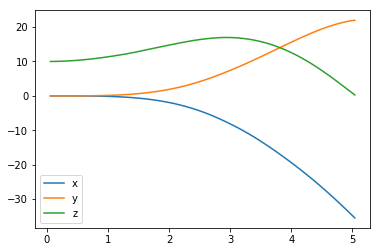

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

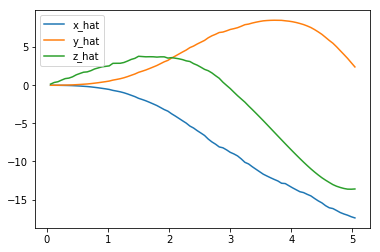

In [20]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

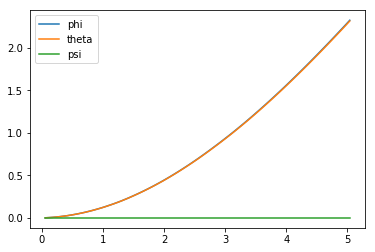

In [21]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

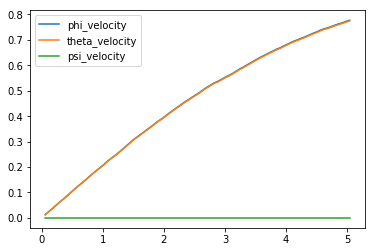

In [22]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

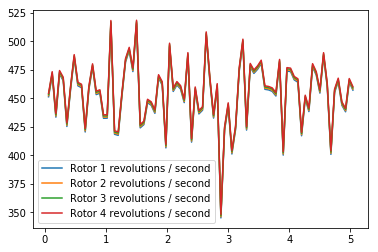

In [23]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [24]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-35.47421192  21.98988668   0.27232713   2.3248501    2.31577989
   0.        ]
[-17.39987311   2.4028401  -13.60362159]
[0.77739716 0.77481026 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent -- this is stochastic policy search

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

<font color=red>please note that i changed target to [10, 10, 0] -- previous target [0, 0, 10] equals to starting position</font>

Episode = 10000, score = -481.688 (best = -352.029), noise_scale = 3 steps=23   CPU times: user 3min 34s, sys: 15.2 s, total: 3min 49s
Wall time: 3min 38s


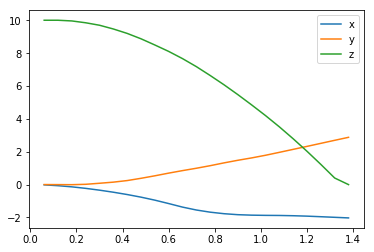

In [5]:
%%time

'''
didn't see improvment when num_episodes > 3000
linear s->a is too weak for this problem
reward doesn't make sense
'''
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10000
target_pos = np.array([10., 10., 0.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

score_, times_, xs_, ys_, zs_ = -np.inf, None, None, None, None

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    #print('episod ', i_episode, ' init pos: ', task.sim.pose)
    steps = 0
    times, xs, ys, zs = [], [], [], []
    while True:
        steps += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        times.append(task.sim.time)
        xs.append(task.sim.pose[0])
        ys.append(task.sim.pose[1])
        zs.append(task.sim.pose[2])
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {} steps={} ".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale, steps), end="")  # [debug]
            break
    if agent.score > score_:
        score_, times_, xs_, ys_, zs_ = agent.best_score, times, xs, ys, zs

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(times, xs, label='x')
plt.plot(times, ys, label='y')
plt.plot(times, zs, label='z')
plt.legend()
_ = plt.ylim()


This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent! -- pre part 0

<font color=green>
it is hard for the given plicy search code to produce good results. 
I guess the reward function is misleading the search, because we award 1 points for each step. Why do we care about number of steps? I just made a very small change in PolicySearch_Agnet.step: from "self.total_reward += reward" to "self.total_reward = reward".
After this tiny change, we are able to see good results.

one sample output line:
Episode = 5011, score = -15.456 (best =  -0.512), noise_scale = 1.6 steps=28  
we can see, around a good solution (reward=-0.512), we see much bigger errors; this means jump around with scale=1.6 is too big -- so that final reward changed too much.  let's try smaller noise scale so that we climb small steps.

with too small noise scale cap, we are stuck in a local optimum:
Episode = 2479, score = -14.494 (best = -10.258), noise_scale = 0.5 steps=23
Episode = 8339, score = -14.449 (best =  -9.999), noise_scale = 0.5 steps=25  
Episode = 9620, score = -16.956 (best =  -9.999), noise_scale = 0.5 steps=24  

finally, 
noise_scale [0.01, 3]
Episode = 10000, score = -11.128 (best =   1.011), noise_scale = 3 steps=33 best score:  1.0105633097761846
</font>

Episode = 10000, score = -18.188 (best =   1.348), noise_scale = 3.2 steps=23 best score:  1.3480823994448228
CPU times: user 3min 32s, sys: 15.6 s, total: 3min 47s
Wall time: 3min 34s


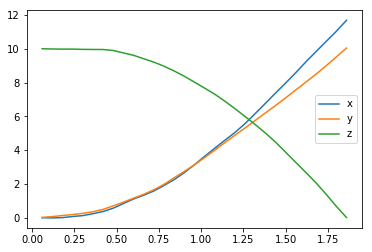

In [121]:
%%time

'''
this code re-ran after only rewards at end of episodes are considered
-- we only care whether target pos is reached; don't care how many steps the agent has moved
we see >30 steps in episodes; more than previously ~25 steps

I ran a few times, sometimes got bad results, such as (6, 2, 0) while target is (10, 10, 0);
but often got reasonably good results. this time the result is really good.
'''
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10000
target_pos = np.array([10., 10., 0.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

score_, ts_, xs_, ys_, zs_, bs_ = -np.inf, None, None, None, None, None

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    #print('episod ', i_episode, ' init pos: ', task.sim.pose)
    steps = 0
    ts, xs, ys, zs, bs = [], [], [], [], bs[]
    while True:
        steps += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        ts.append(task.sim.time)
        xs.append(task.sim.pose[0])
        ys.append(task.sim.pose[1])
        zs.append(task.sim.pose[2])
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {} steps={} ".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale, steps), end="")  # [debug]
            break
    if agent.score > score_:
        score_, ts_, xs_, ys_, zs_, bs_ = agent.score, ts, xs, ys, zs, agent.score

import matplotlib.pyplot as plt
%matplotlib inline
print('best score: ', score_)
plt.plot(ts_, bs_, label='best')
plt.plot(ts_, xs_, label='x')
plt.plot(ts_, ys_, label='y')
plt.plot(ts_, zs_, label='z')
plt.legend()
_ = plt.ylim()


## Define the Task, Design the Agent, and Train Your Agent! -- pre part 1

<font color=green>
we can get reasonably good results every two or three runs.  then i played with noise scale a little.

one sample output line:
Episode = 5011, score = -15.456 (best =  -0.512), noise_scale = 1.6 steps=28  
we can see, around a good solution (reward=-0.512), we see much bigger errors; this means jump around with scale=1.6 is too big -- so that final reward changed too much.  let's try smaller noise scale so that we climb small steps.

with too small noise scale cap, we are stuck in a local optimum:
Episode = 2479, score = -14.494 (best = -10.258), noise_scale = 0.5 steps=23
Episode = 8339, score = -14.449 (best =  -9.999), noise_scale = 0.5 steps=25  
Episode = 9620, score = -16.956 (best =  -9.999), noise_scale = 0.5 steps=24  

finally, i believe the original noise scale range is reasonable; i chose [0.01, 3]
Episode = 10000, score = -11.128 (best =   1.011), noise_scale = 3 steps=33 best score:  1.0105633097761846
</font>

Episode = 10000, score = -11.128 (best =   1.011), noise_scale = 3 steps=33 best score:  1.0105633097761846
CPU times: user 3min 40s, sys: 16 s, total: 3min 56s
Wall time: 3min 42s


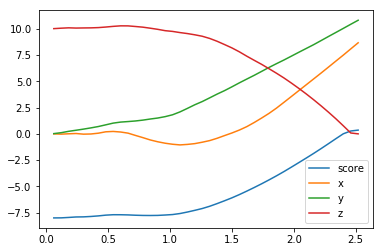

In [127]:
%%time

'''
also, i print change of scores
'''
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 10000
target_pos = np.array([10., 10., 0.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

score_, ts_, xs_, ys_, zs_, bs_ = -np.inf, None, None, None, None, None

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    #print('episod ', i_episode, ' init pos: ', task.sim.pose)
    steps = 0
    ts, xs, ys, zs, bs = [], [], [], [], []
    while True:
        steps += 1
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        ts.append(task.sim.time)
        xs.append(task.sim.pose[0])
        ys.append(task.sim.pose[1])
        zs.append(task.sim.pose[2])
        bs.append(task.get_reward())
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {} steps={} ".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale, steps), end="")  # [debug]
            break
    if agent.score > score_:
        score_, ts_, xs_, ys_, zs_, bs_ = agent.score, ts, xs, ys, zs, bs

import matplotlib.pyplot as plt
%matplotlib inline
print('best score: ', score_)
plt.plot(ts_, bs_, label='score')
plt.plot(ts_, xs_, label='x')
plt.plot(ts_, ys_, label='y')
plt.plot(ts_, zs_, label='z')
plt.legend()
_ = plt.ylim()


Episode = 10000, score = -19.613 (best =  -2.708), noise_scale = 3 steps=31 best score:  -2.708497686379669
CPU times: user 3min 30s, sys: 15.1 s, total: 3min 45s
Wall time: 3min 32s


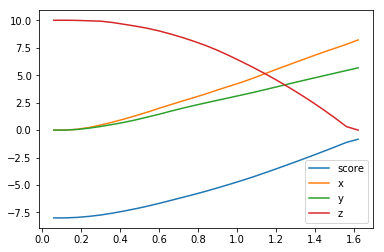

In [128]:
%%time
#I ran it again; this time the final result is worse than the above; -- ok for stochastic search

Episode = 20000, score = -15.700 (best =  -1.895), noise_scale = 3 steps=24 best score:  -1.8947024086212174
CPU times: user 7min 3s, sys: 31.4 s, total: 7min 34s
Wall time: 7min 7s


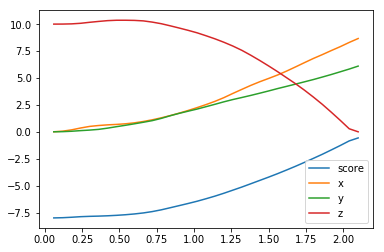

In [130]:
%%time
#another run; seems more often than not we can get reasonably good results.

Episode = 10000, score =  -7.787 (best =  -5.777), noise_scale = 3 steps=25 best score:  -5.77747707683924
CPU times: user 3min 27s, sys: 15.2 s, total: 3min 42s
Wall time: 3min 29s


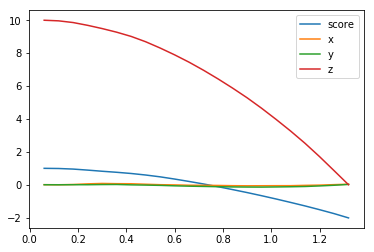

In [133]:
%%time

'''
num_episodes = 10000
target_pos = np.array([0., 0., 10.0])


this seems foundamentally wrong: z cannot come back to 10! -- was this caused by any inherent nature of linear model?
'''

Episode = 10000, score =  -6.341 (best =  -1.708), noise_scale = 3 steps=25 best score:  -1.7083421523250302
CPU times: user 3min 31s, sys: 15.5 s, total: 3min 46s
Wall time: 3min 33s


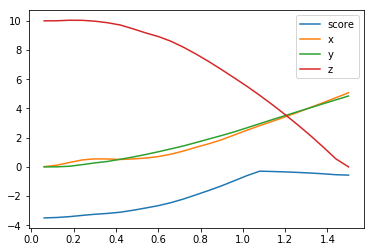

In [135]:
%%time

'''
num_episodes = 10000
target_pos = np.array([5., 5., 5.0])


this is ridiculous! i didn't expect this to happen.  why z always becomes 0? because lift power is not big enough?

'''

Episode = 10000, score = -35.012 (best = -10.603), noise_scale = 3 steps=26 best score:  -10.602950939185398
CPU times: user 3min 33s, sys: 15.4 s, total: 3min 48s
Wall time: 3min 35s


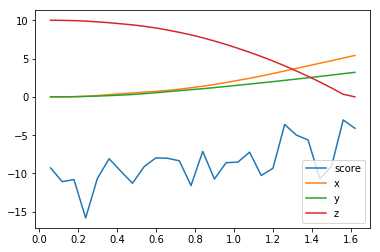

In [146]:
%%time

'''
num_episodes = 10000
target_pos = np.array([5., 5., 5.0])


ok, i updated reward function to punish unstable movement:
reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum() - 1*abs(self.sim.pose[3:6]).sum()# don't rotate!

tried a few times, just couldn't fly the quadcopter. -- this is reasonable, since with total stochastic actions, it is so hard to limi rotations

we were able to get good rewards, because the quadcopter *CRAWLED* on the ground!!!
what an impressive achievement.
'''

In [148]:
print(task.sim.pose)

[-2.25602477 -0.01163908  0.          3.37493756  5.29050869  0.        ]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode = 10000, score = -556.919 (best = -415.846), noise_scale = 3 steps=25 best score:  -415.84609692068955
CPU times: user 3min 32s, sys: 14.9 s, total: 3min 47s
Wall time: 3min 34s


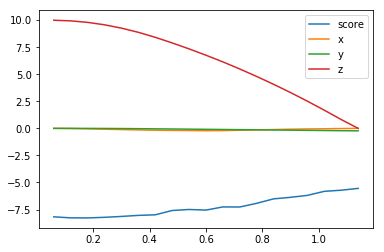

In [152]:
%%time

'''
the quadcopter may start to lose its pose very early; most episodes may end up with failures;
getting rewards at episodes end doesn't bring us any hint.

i modified Task.get_reward to punish three Euler angles, and agent.step() to collect rewards earlier: 'self.total_reward += reward';
but, still, cannot guide the quadcopter to behave well.
'''

<font color=red>OK, stop playing with stochastic policy search here, especially when it is a simple linear theta</font>

## Define the Task, Design the Agent, and Train Your Agent! -- real part

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [ ]:
%%time

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
from task import Task
from agents import agent

max_steps=512
target_pos=np.array([0., 0., 5.])
init_pose=np.array([0., 0., 10., 0., 0., 0.])
task = Task(target_pos=target_pos, init_pose=init_pose, runtime=max_steps)

print(init_pose, '-->', target_pos)
qmaxs, xyzs = agent.main(task, epoches=5000, max_steps=max_steps)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[  0.   0.  10.   0.   0.   0.] --> [ 0.  0.  5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.002 0.01 1 0.9 0.9 32
epoch 100 steps 86 q max 621118.0 x,y,z = 0.20, 1.91, 0.00; a,b,c = 2.14, 5.94, 0.00           
epoch 200 steps 109 q max 1.31153e+07 x,y,z = -0.11, 9.34, 0.00; a,b,c = 3.15, 0.05, 0.00           
epoch 300 steps 141 q max 5.66761e+07 x,y,z = -1.86, 18.44, 0.00; a,b,c = 3.42, 0.39, 0.00           
epoch 400 steps 186 q max 1.40398e+08 x,y,z = -4.30, 28.74, 0.00; a,b,c = 3.41, 0.54, 0.00           
epoch 500 steps 249 q max 2.77532e+08 x,y,z = -7.50, 41.38, 0.00; a,b,c = 3.27, 0.63, 0.00           
epoch 600 steps 321 q max 2.95156e+08 x,y,z = -26.62, 50.33, 0.00; a,b,c = 2.80, 1.30, 0.00           
epoch 700 steps 341 q max 3.63758e+08 x,y,z = -46.07, 45.61, 0.00; a,b,c = 2.66, 1.89, 0.00       

In [7]:
%%time

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import numpy as np
from task import Task
from agents import agent

max_steps=256
target_pos=np.array([0., 0., 25.])
init_pose=np.array([0., 0., 10., 0., 0., 0.])
task = Task(target_pos=target_pos, init_pose=init_pose, runtime=max_steps)

print(init_pose, '-->', target_pos)
qmaxs, xyzs = agent.main(task, epoches=100, max_steps=max_steps)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[  0.   0.  10.   0.   0.   0.] --> [  0.   0.  25.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 128000 12 4 500 0.001 0.01 1 0.9 0.9 32
epoch 10 steps 256 q max 1.86448e+08 x,y,z = 31.76, 24.06, 23.87; a,b,c = 1.62, 4.39, 0.00           
epoch 20 steps 256 q max 5.30954e+08 x,y,z = -10.41, 31.97, 33.21; a,b,c = 1.30, 6.25, 0.00           
------------ target pos reached.  epoch  29 step 134 (0.95, 0.84, 24.83), angles (6.25, 6.10, 0.00)
epoch 30 steps 256 q max 6.98993e+08 x,y,z = 12.55, -28.85, 31.42; a,b,c = 4.31, 5.86, 0.00           
------------ target pos reached.  epoch  36 step 126 (0.28, 0.06, 23.45), angles (0.02, 6.26, 0.00)
------------ target pos reached.  epoch  37 step 131 (-0.78, -0.40, 24.28), angles (6.12, 0.21, 0.00)
epoch 40 steps 256 q max 8.12759e+08 x,y,z = -25.51, 40.16, 9.44; a,b,c = 2.36, 1.48, 0.0

<pre> trained with all original hyperparameters:
epoch 1 steps 79 q max 122.60367 x, y, z = -0.73, 0.69, 0.00          
epoch 2 steps 128 q max 144.22716 x, y, z = -0.01, 41.91, 3.52          
epoch 3 steps 112 q max -1.3051492 x, y, z = 1.98, 29.21, 0.00          
epoch 4 steps 80 q max -2.5416307 x, y, z = -0.95, 13.17, 0.00          
epoch 5 steps 74 q max -3.118029 x, y, z = -4.44, 3.87, 0.00
...

then, i changed sone hyperparameters:
actor_lr: 0.01, critic_lr: 0.1, actor_tau: 0.5, critic_tau: 0.5
epoch 1 steps 72 q max 153.914 x, y, z = 0.00, 0.14, 0.00          
epoch 2 steps 69 q max 0.129112 x, y, z = -0.21, -0.05, 0.00          
epoch 3 steps 74 q max 0.0482344 x, y, z = 1.68, 0.25, 0.00          
epoch 4 steps 75 q max -0.0636819 x, y, z = 1.69, 0.84, 0.00          
epoch 5 steps 75 q max -0.169635 x, y, z = 1.57, 1.09, 0.00          
epoch 6 steps 75 q max -0.262138 x, y, z = 1.57, 1.09, 0.00          
epoch 7 steps 76 q max -0.338767 x, y, z = 1.11, 0.03, 0.00          
epoch 8 steps 77 q max -0.379749 x, y, z = 1.18, 0.24, 0.00          
epoch 9 steps 72 q max -0.410336 x, y, z = 1.28, -0.16, 0.00          
epoch 10 steps 73 q max -0.437462 x, y, z = 1.43, -0.12, 0.00


then, actor_lr: 0.01, critic_lr: 0.1, actor_tau: 0.1, critic_tau: 0.1
epoch 1 steps 71 q max 4373.24 x, y, z = -0.05, -0.10, 0.00          
epoch 2 steps 72 q max 3875.43 x, y, z = 0.59, -0.48, 0.00          
epoch 3 steps 59 q max 0.470016 x, y, z = 0.28, -1.47, 0.00          
epoch 4 steps 58 q max 0.442568 x, y, z = 0.30, -0.92, 0.00          
epoch 5 steps 58 q max 0.433358 x, y, z = 0.30, -0.90, 0.00          
... # no change of (x, y, z) thereafter


then, actor_lr: 0.001, critic_lr: 0.01, actor_tau: 0.01, critic_tau: 0.01
epoch 1 steps 66 q max 15.9476 x, y, z = -0.00, 0.00, 0.00          
epoch 2 steps 72 q max 7.18737 x, y, z = -0.09, 0.06, 0.00          
epoch 3 steps 76 q max 0.207864 x, y, z = -0.13, 0.04, 0.00          
epoch 4 steps 75 q max 0.00405932 x, y, z = -0.12, 0.04, 0.00          
epoch 5 steps 75 q max -0.0113229 x, y, z = -0.12, 0.04, 0.00          
epoch 6 steps 75 q max -0.0237919 x, y, z = -0.11, 0.04, 0.00          
epoch 7 steps 75 q max -0.039253 x, y, z = -0.11, 0.04, 0.00          
... # no change of (x, y, z) thereafter


later, i started to print out more info:
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 1000 0.05 0.5 1 0.1 0.1 32
epoch 1 steps 55 q max 9972.43 x, y, z = 0.88, -0.09, 0.00          
epoch 2 steps 128 q max 5.10642 x, y, z = 0.00, 0.00, 78.12          
... # no change of (x, y, z) thereafter


then, replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 1000 0.05 0.5 1 0.1 0.1 32
epoch 1 steps 55 q max 9972.43 x, y, z = 0.88, -0.09, 0.00          
epoch 2 steps 128 q max 5.10642 x, y, z = 0.00, 0.00, 78.12          
...


then, rollback some of my code changes, tested on original code, 
<br>played with action_bound... if 100, the quadcopter fell to (0, 0, 0); if 10000, it flew to (-37.05, 0.00, 300.00) -- i guess z=300 is the sky limit; in both cases, episode terminated around 6x steps


</pre>

<font color=red>================================================== now, let's train after episode finishes</font>

<pre>[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 1 steps 66 q max 0.00313529 x,y,z = 0.00, 0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 2 steps 77 q max -4338.52 x,y,z = -0.05, -0.00, 0.00; a,b,c = 0.01, 6.05, 0.00           
epoch 3 steps 220 q max 2598.71 x,y,z = 23.82, 1.92, 0.00; a,b,c = 0.33, 3.95, 0.00           
epoch 4 steps 256 q max -13805.6 x,y,z = 32.07, 3.83, 19.94; a,b,c = 0.47, 4.44, 0.00           
epoch 5 steps 256 q max 2149.99 x,y,z = 21.17, 6.13, 37.95; a,b,c = 0.47, 5.31, 0.00           
epoch 6 steps 256 q max 5072.63 x,y,z = 11.51, 7.42, 44.53; a,b,c = 0.49, 5.78, 0.00           
epoch 7 steps 256 q max 3707.5 x,y,z = 5.99, 7.98, 46.61; a,b,c = 0.50, 6.03, 0.00           
epoch 8 steps 256 q max 380.569 x,y,z = 3.12, 8.23, 47.30; a,b,c = 0.51, 6.15, 0.00           
epoch 9 steps 256 q max -1108.37 x,y,z = 1.67, 8.36, 47.55; a,b,c = 0.51, 6.21, 0.00           
epoch 10 steps 256 q max -1359.81 x,y,z = 0.91, 8.42, 47.65; a,b,c = 0.52, 6.24, 0.00           
epoch 11 steps 256 q max -870.615 x,y,z = 0.52, 8.45, 47.69; a,b,c = 0.52, 6.26, 0.00           
epoch 12 steps 256 q max -234.17 x,y,z = 0.31, 8.47, 47.71; a,b,c = 0.52, 6.27, 0.00           
epoch 13 steps 256 q max 257.382 x,y,z = 0.19, 8.48, 47.72; a,b,c = 0.52, 6.28, 0.00    
... ...


[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.005 0.05 1 0.01 0.01 64
epoch 1 steps 66 q max 0.0403729 x,y,z = 0.00, 0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 2 steps 66 q max -10.648 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.00, 6.28, 0.00           
epoch 3 steps 66 q max -0.266548 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.00, 6.28, 0.00           
epoch 4 steps 66 q max 1.19953 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.00, 6.28, 0.00           
epoch 5 steps 66 q max 0.0322366 x,y,z = 0.00, 0.00, 0.00; a,b,c = 6.28, 0.00, 0.00           
epoch 6 steps 66 q max -0.120804 x,y,z = -0.00, 0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 7 steps 66 q max 1.22225 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.00, 6.28, 0.00           
...

[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.005 0.05 1 0.01 0.01 64
epoch 1 steps 66 q max 0.0285774 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.00, 6.28, 0.00           
epoch 2 steps 66 q max -10.4231 x,y,z = -0.00, 0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 3 steps 66 q max -0.457215 x,y,z = 0.00, -0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 4 steps 66 q max 0.600695 x,y,z = 0.00, -0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 5 steps 66 q max 0.0852939 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.00, 6.28, 0.00           
epoch 6 steps 66 q max 2.44561 x,y,z = 0.00, 0.00, 0.00; a,b,c = 6.28, 0.00, 0.00           
epoch 7 steps 66 q max 10.9871 x,y,z = 0.00, 0.00, 0.00; a,b,c = 6.28, 0.00, 0.00           
epoch 8 steps 66 q max 21.6822 x,y,z = 0.00, 0.00, 0.00; a,b,c = 6.28, 0.00, 0.00           
epoch 9 steps 66 q max 31.0293 x,y,z = 0.00, 0.00, 0.00; a,b,c = 6.28, 0.00, 0.00           
epoch 10 steps 66 q max 28.1951 x,y,z = 0.00, 0.01, 0.00; a,b,c = 6.27, 0.00, 0.00           
epoch 11 steps 66 q max 34.2581 x,y,z = -0.00, 0.01, 0.00; a,b,c = 6.26, 6.28, 0.00           
epoch 12 steps 67 q max 0.526656 x,y,z = -0.01, 0.03, 0.00; a,b,c = 6.23, 6.27, 0.00           
epoch 13 steps 67 q max 8.8461 x,y,z = -0.02, 0.06, 0.00; a,b,c = 6.19, 6.26, 0.00           
epoch 14 steps 67 q max 15.2769 x,y,z = -0.04, 0.09, 0.00; a,b,c = 6.13, 6.22, 0.00           
epoch 15 steps 67 q max 1.74582 x,y,z = -0.06, 0.11, 0.00; a,b,c = 6.07, 6.18, 0.00           
...


adding noise makes changes:
[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 1 steps 66 q max 0.0585313 x,y,z = -0.00, 0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 2 steps 77 q max -13411.7 x,y,z = 0.01, 0.03, 0.00; a,b,c = 6.15, 0.06, 0.00           
epoch 3 steps 218 q max 3096.02 x,y,z = -4.17, -21.64, 0.00; a,b,c = 4.84, 0.18, 0.00           
epoch 4 steps 256 q max 664.55 x,y,z = 16.77, -0.52, 37.41; a,b,c = 6.24, 5.30, 0.00           
epoch 5 steps 256 q max 0.352975 x,y,z = 22.08, 6.14, 38.82; a,b,c = 0.67, 4.85, 0.00           
epoch 6 steps 256 q max 0.532146 x,y,z = 43.34, 26.11, 15.15; a,b,c = 2.36, 3.44, 0.00           
epoch 7 steps 256 q max 0.686437 x,y,z = 53.97, 37.66, 2.93; a,b,c = 2.78, 3.51, 0.00           
epoch 8 steps 256 q max 0.821052 x,y,z = 14.70, 29.81, 32.26; a,b,c = 1.64, 5.47, 0.00           
epoch 9 steps 256 q max 0.939589 x,y,z = 22.44, 22.36, 33.05; a,b,c = 1.15, 4.63, 0.00           
epoch 10 steps 256 q max 1.04482 x,y,z = 30.65, 11.39, 32.86; a,b,c = 0.23, 4.65, 0.00           
epoch 11 steps 256 q max 1.13861 x,y,z = 32.02, -2.50, 32.08; a,b,c = 6.04, 4.49, 0.00           
epoch 12 steps 256 q max 1.2227 x,y,z = 27.54, 27.96, 21.04; a,b,c = 2.32, 5.01, 0.00           
epoch 13 steps 256 q max 1.29817 x,y,z = -6.10, 33.16, 34.48; a,b,c = 1.18, 0.33, 0.00           
epoch 14 steps 256 q max 1.36606 x,y,z = -5.94, -5.71, 48.37; a,b,c = 6.14, 5.90, 0.00           
epoch 15 steps 256 q max 1.42727 x,y,z = 30.70, -1.02, 34.82; a,b,c = 0.25, 4.94, 0.00           
epoch 16 steps 256 q max 1.48252 x,y,z = -21.90, 33.25, 25.42; a,b,c = 1.59, 0.96, 0.00           
epoch 17 steps 256 q max 1.53241 x,y,z = -39.34, 23.52, 14.40; a,b,c = 2.03, 2.15, 0.00           
epoch 18 steps 256 q max 1.59099 x,y,z = -49.17, 7.80, 3.66; a,b,c = 2.63, 3.55, 0.00           
epoch 19 steps 250 q max 1.64402 x,y,z = -48.54, 7.38, 0.00; a,b,c = 1.04, 3.00, 0.00           
epoch 20 steps 256 q max 1.69203 x,y,z = -32.68, -4.68, 34.12; a,b,c = 0.02, 1.28, 0.00           
epoch 21 steps 256 q max 1.7355 x,y,z = -39.65, 10.03, 18.90; a,b,c = 0.82, 2.54, 0.00           
epoch 22 steps 256 q max 1.77486 x,y,z = -47.16, 3.07, 0.31; a,b,c = 0.42, 3.38, 0.00           
epoch 23 steps 256 q max 1.81049 x,y,z = -39.99, 0.02, 23.15; a,b,c = 5.89, 1.78, 0.00           
epoch 24 steps 256 q max 1.84274 x,y,z = -39.07, -18.68, 18.62; a,b,c = 5.16, 1.72, 0.00           
epoch 25 steps 256 q max 1.87187 x,y,z = -29.12, 13.90, 31.86; a,b,c = 0.90, 1.79, 0.00           
epoch 26 steps 256 q max 1.89822 x,y,z = -47.15, -4.08, 9.02; a,b,c = 5.38, 1.99, 0.00           
epoch 27 steps 256 q max 1.922 x,y,z = -31.20, -9.69, 31.66; a,b,c = 4.91, 1.55, 0.00           
...

</pre>

<font color=red>================================================== now, layers 100, 75</font>

<pre>[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 1 steps 66 q max 0.00347305 x,y,z = -0.00, 0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 2 steps 68 q max -1487.84 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.01, 0.00, 0.00           
epoch 3 steps 76 q max 418.446 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.00, 6.28, 0.00           
epoch 4 steps 102 q max 144.538 x,y,z = 0.04, 0.02, 0.00; a,b,c = 6.27, 6.28, 0.00           
epoch 5 steps 201 q max 0.275856 x,y,z = -3.66, -11.19, 0.00; a,b,c = 5.43, 0.19, 0.00           
epoch 6 steps 246 q max 0.417984 x,y,z = 20.31, -28.90, 0.00; a,b,c = 4.79, 5.13, 0.00           
epoch 7 steps 256 q max 0.539275 x,y,z = -24.50, -21.16, 17.52; a,b,c = 5.14, 1.45, 0.00           
epoch 8 steps 256 q max 0.643607 x,y,z = -42.71, 6.52, 4.74; a,b,c = 0.79, 2.45, 0.00           
epoch 9 steps 256 q max 0.734029 x,y,z = -43.55, 12.77, 8.91; a,b,c = 1.87, 2.48, 0.00           
epoch 10 steps 256 q max 0.812776 x,y,z = -42.17, 14.07, 13.50; a,b,c = 0.91, 1.79, 0.00           
epoch 11 steps 256 q max 0.881527 x,y,z = 5.09, 13.30, 45.75; a,b,c = 0.22, 6.17, 0.00           
epoch 12 steps 256 q max 0.941907 x,y,z = -24.40, 22.54, 33.44; a,b,c = 1.33, 0.24, 0.00           
epoch 13 steps 256 q max 0.994676 x,y,z = 37.82, 39.47, 4.75; a,b,c = 2.49, 4.27, 0.00           
epoch 14 steps 256 q max 1.04118 x,y,z = 29.38, 10.12, 34.30; a,b,c = 6.02, 4.78, 0.00           
epoch 15 steps 256 q max 1.08199 x,y,z = 27.65, -35.55, 16.82; a,b,c = 3.76, 4.33, 0.00           
epoch 16 steps 256 q max 1.11738 x,y,z = -5.24, -40.24, 12.03; a,b,c = 2.98, 6.28, 0.00           
epoch 17 steps 256 q max 1.14776 x,y,z = 3.62, -39.39, 20.00; a,b,c = 3.89, 5.96, 0.00           
epoch 18 steps 256 q max 1.1738 x,y,z = -7.28, -38.98, 17.15; a,b,c = 3.29, 0.53, 0.00           
epoch 19 steps 251 q max 1.19572 x,y,z = -47.48, -7.88, 0.00; a,b,c = 3.92, 3.27, 0.00           
epoch 20 steps 256 q max 1.21372 x,y,z = -44.90, -17.50, 7.61; a,b,c = 3.84, 2.40, 0.00           
...


without noise:
[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 1 steps 66 q max -0.00177137 x,y,z = 0.00, 0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 2 steps 67 q max -384.229 x,y,z = -0.00, 0.01, 0.00; a,b,c = 6.27, 6.28, 0.00           
epoch 3 steps 74 q max 372.123 x,y,z = -0.20, -0.07, 0.00; a,b,c = 0.20, 5.86, 0.00           
epoch 4 steps 76 q max -1607.01 x,y,z = -3.56, -0.19, 0.00; a,b,c = 0.63, 0.58, 0.00           
epoch 5 steps 68 q max -93.1967 x,y,z = 0.24, -0.58, 0.00; a,b,c = 0.96, 3.26, 0.00           
epoch 6 steps 76 q max 572.559 x,y,z = 2.96, 0.71, 0.00; a,b,c = 1.31, 3.66, 0.00           
epoch 7 steps 67 q max 233.672 x,y,z = 1.57, -0.57, 0.00; a,b,c = 1.03, 3.66, 0.00           
epoch 8 steps 66 q max 16.5082 x,y,z = -4.74, -1.09, 0.00; a,b,c = 0.83, 2.37, 0.00           
epoch 9 steps 88 q max 0.736767 x,y,z = -14.61, -0.08, 0.00; a,b,c = 0.98, 6.28, 0.00           
epoch 10 steps 173 q max 0.796359 x,y,z = -25.72, 7.28, 0.00; a,b,c = 2.17, 0.82, 0.00           
epoch 11 steps 208 q max 0.848358 x,y,z = -0.79, 3.12, 0.00; a,b,c = 2.33, 5.88, 0.00           
epoch 12 steps 215 q max 0.893953 x,y,z = 21.54, -2.68, 0.00; a,b,c = 1.97, 0.26, 0.00           
epoch 13 steps 220 q max 0.934054 x,y,z = 34.99, -4.75, 0.00; a,b,c = 1.70, 1.04, 0.00           
epoch 14 steps 231 q max 0.969195 x,y,z = 43.54, -4.38, 0.00; a,b,c = 1.57, 1.56, 0.00           
epoch 15 steps 247 q max 0.999876 x,y,z = 50.76, -3.22, 0.00; a,b,c = 1.54, 1.90, 0.00           
epoch 16 steps 256 q max 1.02649 x,y,z = 51.31, 1.73, 4.14; a,b,c = 1.46, 2.41, 0.00           
epoch 17 steps 256 q max 1.04943 x,y,z = 45.31, 6.70, 11.51; a,b,c = 1.30, 3.05, 0.00           
epoch 18 steps 256 q max 1.06906 x,y,z = 40.62, 8.58, 17.58; a,b,c = 1.17, 3.57, 0.00           
epoch 19 steps 256 q max 1.08566 x,y,z = 37.19, 9.41, 22.78; a,b,c = 1.06, 3.99, 0.00           
epoch 20 steps 256 q max 1.09953 x,y,z = 34.25, 9.99, 27.31; a,b,c = 0.97, 4.33, 0.00           
...

to print sparsely:
[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 1 steps 66 q max 0.048323 x,y,z = 0.00, 0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 11 steps 72 q max -104.797 x,y,z = 1.43, 0.42, 0.00; a,b,c = 1.00, 3.31, 0.00           
epoch 21 steps 75 q max 2.54573 x,y,z = 3.49, 0.22, 0.00; a,b,c = 5.23, 2.63, 0.00           
epoch 31 steps 73 q max 3.26488 x,y,z = -1.31, 0.03, 0.00; a,b,c = 3.00, 4.54, 0.00           
epoch 41 steps 73 q max 3.39055 x,y,z = -2.11, -0.16, 0.00; a,b,c = 1.31, 5.00, 0.00           
epoch 51 steps 74 q max 3.26158 x,y,z = 0.35, 0.68, 0.00; a,b,c = 2.88, 0.40, 0.00           
epoch 61 steps 73 q max 3.02337 x,y,z = 0.93, 0.38, 0.00; a,b,c = 0.07, 1.09, 0.00           
...


[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 10 steps 95 q max 1.14697 x,y,z = -0.08, -0.21, 0.00; a,b,c = 6.01, 0.07, 0.00           
epoch 20 steps 158 q max 1.73257 x,y,z = 0.16, -9.42, 0.00; a,b,c = 4.58, 6.20, 0.00           
epoch 30 steps 205 q max 1.82329 x,y,z = 3.42, -19.36, 0.00; a,b,c = 4.49, 5.89, 0.00           
epoch 40 steps 210 q max 1.69018 x,y,z = 3.09, -22.13, 0.00; a,b,c = 4.13, 6.01, 0.00           
epoch 50 steps 200 q max 1.44301 x,y,z = 3.03, -20.87, 0.00; a,b,c = 4.01, 5.99, 0.00           
epoch 60 steps 213 q max 1.1682 x,y,z = -1.33, -23.23, 0.00; a,b,c = 4.13, 0.14, 0.00           
epoch 70 steps 221 q max 0.89381 x,y,z = 12.49, -22.70, 0.00; a,b,c = 4.26, 5.33, 0.00           
epoch 80 steps 206 q max 0.559015 x,y,z = 12.48, -19.12, 0.00; a,b,c = 3.97, 5.54, 0.00           
epoch 90 steps 208 q max 0.191928 x,y,z = -3.74, -22.11, 0.00; a,b,c = 3.85, 0.14, 0.00           
epoch 100 steps 222 q max -0.194857 x,y,z = 11.56, -22.63, 0.00; a,b,c = 4.09, 5.10, 0.00           
epoch 110 steps 197 q max -0.589453 x,y,z = -19.56, -12.50, 0.00; a,b,c = 4.63, 1.95, 0.00           
epoch 120 steps 205 q max -1.00435 x,y,z = 12.37, -19.12, 0.00; a,b,c = 4.01, 5.40, 0.00           
epoch 130 steps 248 q max -1.40786 x,y,z = 9.11, -28.94, 0.00; a,b,c = 4.52, 5.36, 0.00           
epoch 140 steps 205 q max -1.81279 x,y,z = -22.77, -11.25, 0.00; a,b,c = 4.96, 1.82, 0.00           
epoch 150 steps 197 q max -2.22896 x,y,z = 7.27, -19.87, 0.00; a,b,c = 3.78, 5.39, 0.00           
epoch 160 steps 198 q max -2.59999 x,y,z = -13.39, -17.35, 0.00; a,b,c = 3.91, 1.37, 0.00           
epoch 170 steps 219 q max -2.97123 x,y,z = 4.78, -22.79, 0.00; a,b,c = 3.84, 5.95, 0.00           
epoch 180 steps 209 q max -3.33954 x,y,z = 8.49, -22.23, 0.00; a,b,c = 4.21, 5.56, 0.00           
epoch 190 steps 225 q max -3.71834 x,y,z = 17.14, -19.39, 0.00; a,b,c = 4.35, 4.60, 0.00           
epoch 200 steps 188 q max -4.08654 x,y,z = 3.72, -17.67, 0.00; a,b,c = 3.22, 5.93, 0.00           
CPU times: user 6min 4s, sys: 7.79 s, total: 6min 12s
Wall time: 5min 37s
</pre>

<font color=red>==========Using new reward, which is the improvement of distance to target pos=====</font>
<pre>
hidden layers: 100, 75
[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 10 steps 72 q max 3.98864 x,y,z = -1.16, 1.00, 0.00; a,b,c = 2.40, 2.21, 0.00           
epoch 20 steps 100 q max 3.30543 x,y,z = -10.35, 2.86, 0.00; a,b,c = 5.06, 5.20, 0.00           
epoch 30 steps 103 q max -2.2264 x,y,z = -15.30, -0.26, 0.00; a,b,c = 5.03, 5.11, 0.00           
epoch 40 steps 111 q max 4.36382 x,y,z = -17.99, -1.47, 0.00; a,b,c = 4.95, 4.61, 0.00           
epoch 50 steps 116 q max -2.51604 x,y,z = -19.23, -2.08, 0.00; a,b,c = 4.90, 4.29, 0.00           
epoch 60 steps 118 q max -2.56825 x,y,z = -19.64, -2.32, 0.00; a,b,c = 4.89, 4.16, 0.00           
epoch 70 steps 119 q max -2.60552 x,y,z = -19.83, -2.43, 0.00; a,b,c = 4.88, 4.10, 0.00           
epoch 80 steps 119 q max -2.63891 x,y,z = -19.82, -2.44, 0.00; a,b,c = 4.89, 4.10, 0.00           
epoch 90 steps 120 q max -2.67366 x,y,z = -20.04, -2.52, 0.00; a,b,c = 4.87, 4.04, 0.00           
epoch 100 steps 120 q max -2.70764 x,y,z = -20.04, -2.52, 0.00; a,b,c = 4.87, 4.04, 0.00           

hidden layers: 400, 300
[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 10 steps 236 q max 764.146 x,y,z = 44.09, -0.04, 0.00; a,b,c = 6.19, 2.05, 0.00           
epoch 20 steps 256 q max -106.677 x,y,z = 0.62, 0.00, 48.88; a,b,c = 0.00, 6.26, 0.00           
epoch 30 steps 256 q max 78.2234 x,y,z = 0.04, 0.00, 48.88; a,b,c = 0.00, 6.28, 0.00           
epoch 40 steps 256 q max 550.815 x,y,z = 0.02, 0.00, 48.88; a,b,c = 0.00, 6.28, 0.00           
epoch 50 steps 256 q max -1.791 x,y,z = 0.00, 0.00, 48.88; a,b,c = 0.00, 6.28, 0.00           
epoch 60 steps 256 q max -1.84944 x,y,z = 0.01, 0.00, 48.88; a,b,c = 0.00, 6.28, 0.00           
epoch 70 steps 256 q max -1.88597 x,y,z = 0.00, 0.00, 48.88; a,b,c = 0.00, 6.28, 0.00           
epoch 80 steps 256 q max -1.91606 x,y,z = 0.01, 0.00, 48.88; a,b,c = 0.00, 6.28, 0.00           
epoch 90 steps 256 q max -1.94454 x,y,z = 0.01, 0.00, 48.88; a,b,c = 0.00, 6.28, 0.00           
epoch 100 steps 256 q max -1.97305 x,y,z = 0.01, 0.00, 48.88; a,b,c = 0.00, 6.28, 0.00           

another round, tried to run more epochs, but (x, y, z) stayed unchanged very quickly
epoch 10 steps 256 q max -75.8654 x,y,z = -12.84, 3.44, 46.17; a,b,c = 0.33, 0.71, 0.00           
epoch 20 steps 256 q max 0.38419 x,y,z = -8.44, 8.20, 46.68; a,b,c = 0.52, 0.52, 0.00           
epoch 30 steps 256 q max 0.494329 x,y,z = -8.43, 8.20, 46.69; a,b,c = 0.52, 0.52, 0.00           
epoch 40 steps 256 q max 0.533171 x,y,z = -8.43, 8.20, 46.69; a,b,c = 0.52, 0.52, 0.00   
...
</pre>

<pre>[  0.   0.  10.   0.   0.   0.] --> [ 10.  10.   5.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.05 0.5 1 0.01 0.01 64
epoch 20 steps 256 q max 1.71801 x,y,z = -37.73, 16.44, 19.08; a,b,c = 2.44, 2.68, 0.00           
epoch 40 steps 256 q max 1.92952 x,y,z = 23.52, 25.35, 31.43; a,b,c = 1.67, 5.78, 0.00           
epoch 60 steps 256 q max 1.94179 x,y,z = -41.42, 12.17, 17.51; a,b,c = 1.13, 2.26, 0.00           
epoch 80 steps 256 q max 1.93446 x,y,z = -37.39, 2.03, 25.49; a,b,c = 0.11, 1.96, 0.00           
epoch 100 steps 256 q max 1.923 x,y,z = 11.55, -18.42, 43.69; a,b,c = 5.75, 5.95, 0.00           
epoch 120 steps 256 q max 1.90982 x,y,z = -37.15, 8.46, 23.25; a,b,c = 1.08, 2.45, 0.00           
epoch 140 steps 256 q max 1.89504 x,y,z = -7.04, -5.60, 48.40; a,b,c = 0.63, 0.01, 0.00           
epoch 160 steps 256 q max 1.88198 x,y,z = -37.59, 17.85, 19.83; a,b,c = 2.00, 1.95, 0.00           
epoch 180 steps 256 q max 1.86601 x,y,z = 20.61, 36.15, 15.51; a,b,c = 3.50, 5.31, 0.00           
epoch 200 steps 256 q max 1.84754 x,y,z = 35.46, 1.50, 28.49; a,b,c = 0.40, 4.53, 0.00           
epoch 220 steps 256 q max 1.82038 x,y,z = -37.66, -19.58, 19.66; a,b,c = 5.63, 2.14, 0.00           
epoch 240 steps 256 q max 1.79193 x,y,z = 9.47, -5.14, 47.65; a,b,c = 5.89, 6.04, 0.00           
epoch 260 steps 256 q max 1.76682 x,y,z = -2.45, 9.71, 47.24; a,b,c = 0.44, 0.16, 0.00           
epoch 280 steps 228 q max 1.74478 x,y,z = -41.77, -3.09, 0.00; a,b,c = 4.27, 3.46, 0.00           
epoch 300 steps 256 q max 1.71084 x,y,z = -40.75, -9.77, 20.10; a,b,c = 6.06, 1.90, 0.00           
epoch 320 steps 256 q max 1.68224 x,y,z = 44.08, 7.14, 12.04; a,b,c = 1.22, 3.48, 0.00           
epoch 340 steps 256 q max 1.66199 x,y,z = -41.74, 0.99, 8.72; a,b,c = 0.46, 3.47, 0.00           
epoch 360 steps 256 q max 1.63345 x,y,z = 40.56, 5.35, 19.37; a,b,c = 1.43, 4.13, 0.00           
epoch 380 steps 256 q max 1.61209 x,y,z = -28.08, 8.22, 34.15; a,b,c = 0.34, 2.04, 0.00           
epoch 400 steps 256 q max 1.58229 x,y,z = 33.47, 7.33, 31.37; a,b,c = 0.36, 4.71, 0.00           
epoch 420 steps 256 q max 1.55905 x,y,z = -37.22, 9.79, 23.40; a,b,c = 0.97, 2.25, 0.00           
epoch 440 steps 256 q max 1.53115 x,y,z = -44.30, 3.25, 9.75; a,b,c = 1.72, 3.19, 0.00           
epoch 460 steps 249 q max 1.49759 x,y,z = -44.78, -2.83, 0.00; a,b,c = 0.18, 3.57, 0.00           
epoch 480 steps 256 q max 1.46526 x,y,z = -9.78, 34.32, 24.55; a,b,c = 2.76, 1.14, 0.00           
epoch 500 steps 256 q max 1.44321 x,y,z = -7.95, 6.75, 46.73; a,b,c = 0.61, 0.74, 0.00           
epoch 520 steps 256 q max 1.40927 x,y,z = 26.04, -0.16, 39.98; a,b,c = 6.12, 5.24, 0.00           
epoch 540 steps 256 q max 1.36955 x,y,z = 0.11, -42.13, 1.82; a,b,c = 2.58, 0.60, 0.00           
epoch 560 steps 256 q max 1.33031 x,y,z = 16.64, -11.39, 43.53; a,b,c = 0.19, 5.31, 0.00           
epoch 580 steps 256 q max 1.28844 x,y,z = -17.34, 32.51, 25.31; a,b,c = 2.30, 0.57, 0.00           
epoch 600 steps 256 q max 1.26035 x,y,z = -36.15, -23.81, 18.46; a,b,c = 5.43, 2.01, 0.00           
epoch 620 steps 256 q max 1.22066 x,y,z = -0.21, 43.84, 11.86; a,b,c = 2.81, 0.02, 0.00           
epoch 640 steps 256 q max 1.19151 x,y,z = -16.51, 32.38, 26.22; a,b,c = 2.05, 1.22, 0.00           
epoch 660 steps 229 q max 1.16491 x,y,z = 12.13, 45.15, 0.00; a,b,c = 3.62, 5.22, 0.00           
epoch 680 steps 256 q max 1.13753 x,y,z = -19.85, 32.28, 23.99; a,b,c = 2.06, 1.35, 0.00           
epoch 700 steps 256 q max 1.09625 x,y,z = -15.44, 30.49, 31.50; a,b,c = 1.48, 1.23, 0.00           
epoch 720 steps 256 q max 1.05946 x,y,z = 24.06, 18.28, 39.38; a,b,c = 0.66, 5.97, 0.00           
epoch 740 steps 256 q max 1.02632 x,y,z = -26.80, 28.31, 23.42; a,b,c = 1.71, 2.23, 0.00           
epoch 760 steps 256 q max 0.985913 x,y,z = 32.55, 17.08, 29.97; a,b,c = 0.72, 4.86, 0.00           
epoch 780 steps 256 q max 0.946681 x,y,z = -15.78, 29.01, 32.66; a,b,c = 1.44, 1.00, 0.00           
epoch 800 steps 256 q max 0.910353 x,y,z = -33.25, -16.11, 26.74; a,b,c = 5.72, 2.00, 0.00           
epoch 820 steps 256 q max 0.864075 x,y,z = 24.13, 17.17, 36.80; a,b,c = 1.12, 5.53, 0.00           
epoch 840 steps 256 q max 0.834871 x,y,z = 0.68, 39.43, 21.91; a,b,c = 2.30, 5.56, 0.00           
epoch 860 steps 256 q max 0.79935 x,y,z = -15.16, -25.55, 33.16; a,b,c = 4.41, 0.36, 0.00           
epoch 880 steps 256 q max 0.754421 x,y,z = -22.62, 31.26, 26.14; a,b,c = 1.40, 1.90, 0.00           
epoch 900 steps 256 q max 0.711386 x,y,z = 36.97, 13.89, 22.18; a,b,c = 1.11, 4.34, 0.00           
epoch 920 steps 256 q max 0.684331 x,y,z = 22.75, 30.52, 27.52; a,b,c = 1.62, 5.30, 0.00           
epoch 940 steps 256 q max 0.646069 x,y,z = -33.09, 33.13, 10.83; a,b,c = 2.52, 1.68, 0.00           
epoch 960 steps 228 q max 0.610411 x,y,z = -21.76, 45.28, 0.00; a,b,c = 3.99, 2.26, 0.00           
epoch 980 steps 256 q max 0.567506 x,y,z = -47.98, 5.67, 4.27; a,b,c = 2.35, 3.52, 0.00           
epoch 1000 steps 256 q max 0.520085 x,y,z = -19.05, 42.22, 6.65; a,b,c = 3.05, 0.85, 0.00           
CPU times: user 18min 31s, sys: 58.5 s, total: 19min 29s
Wall time: 15min 21s
</pre>

<pre>
</pre>

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

<font color=red>===================== this is old reward + 100, 75 hidden layers + noise ... ============ </font>

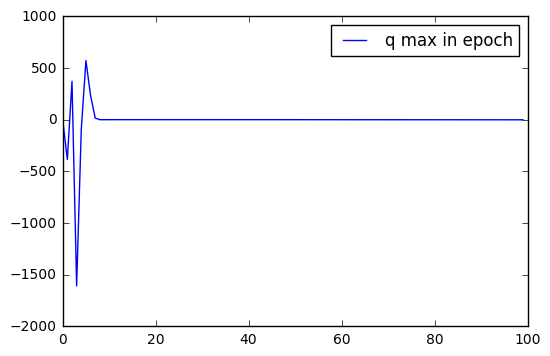

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(qmaxs, label='q max in epoch')
plt.legend()
_ = plt.ylim()

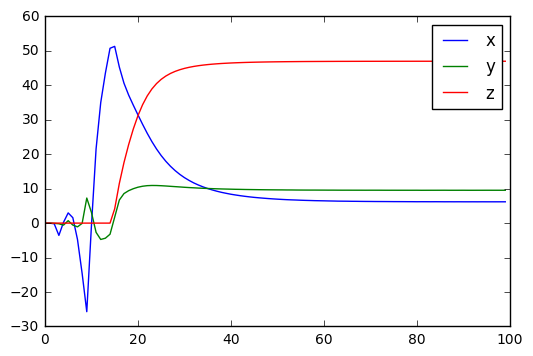

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
xs, ys, zs, _, _, _ = zip(*xyzs)
plt.plot(xs, label='x')
plt.plot(ys, label='y')
plt.plot(zs, label='z')
plt.legend()
_ = plt.ylim()

<font color=red>===================== this is new reward + 400, 300 hidden layers + noise + [-1, 1] rotor speed; 100 epochs ============ </font>

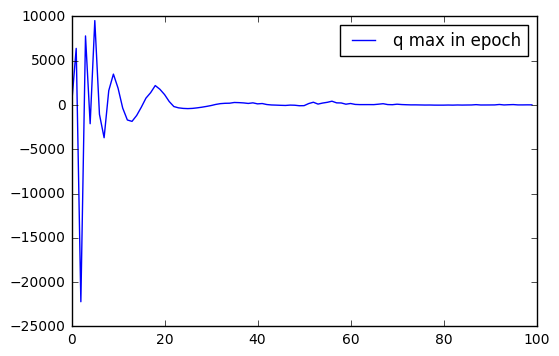

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(qmaxs, label='q max in epoch')
plt.legend()
_ = plt.ylim()

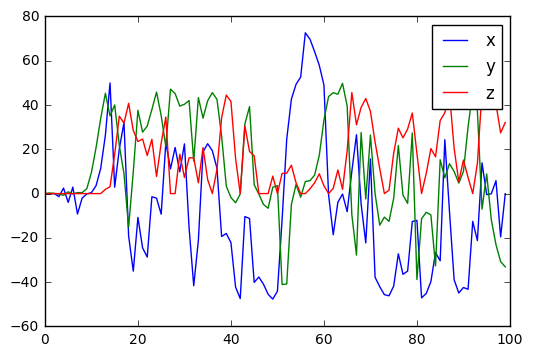

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
xs, ys, zs, _, _, _ = zip(*xyzs)
plt.plot(xs, label='x')
plt.plot(ys, label='y')
plt.plot(zs, label='z')
plt.legend()
_ = plt.ylim()

<font color=red>===================== 5K epochs ============  parameters:  1024 12 4 500 0.002 0.01 1 0.9 0.9 32
</font>

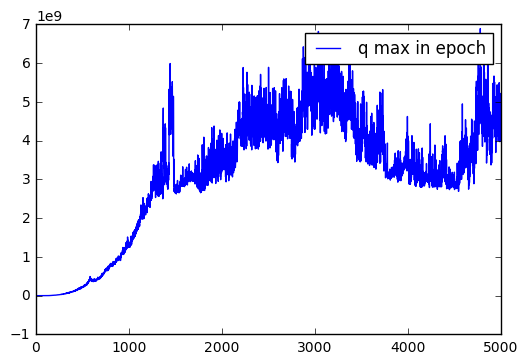

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(qmaxs, label='q max in epoch')
plt.legend()
_ = plt.ylim()

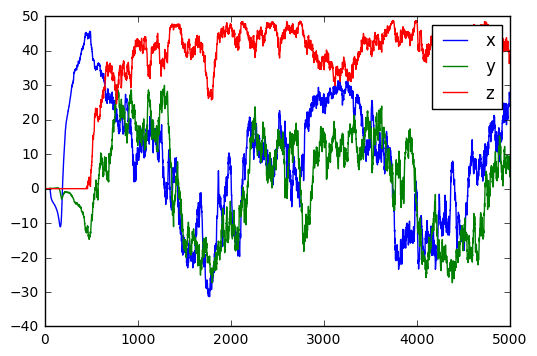

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
xs, ys, zs, _, _, _ = zip(*xyzs)
plt.plot(xs, label='x')
plt.plot(ys, label='y')
plt.plot(zs, label='z')
plt.legend()
_ = plt.ylim()

<font color=red>===================== 3K epochs ============  parameters: 1024 12 4 500 0.002 0.01 1 0.9 0.9 32
</font>

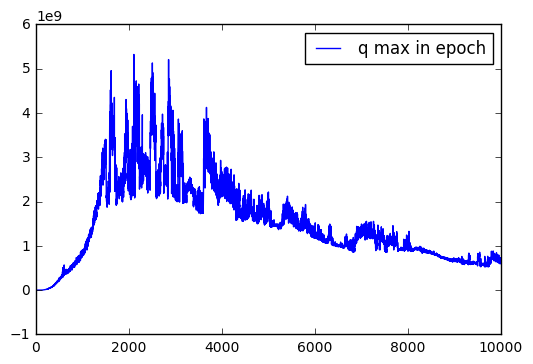

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(qmaxs, label='q max in epoch')
plt.legend()
_ = plt.ylim()

#  ; q max dropped along with epochs

<font color=red>===================== 3K epochs ============  parameters:  1024 12 4 500 0.002 0.01 1 0.9 0.9 32
</font>

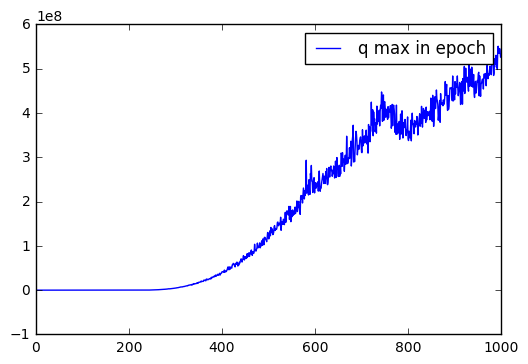

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(qmaxs, label='q max in epoch')
plt.legend()
_ = plt.ylim()

#  ; q max dropped along with epochs

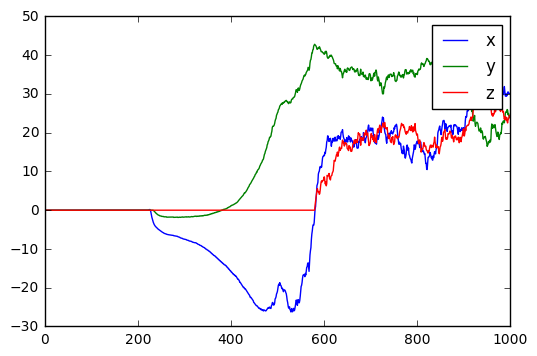

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
xs, ys, zs, _, _, _ = zip(*xyzs)
plt.plot(xs, label='x')
plt.plot(ys, label='y')
plt.plot(zs, label='z')
plt.legend()
_ = plt.ylim()

<font color=red>===================== 100 epochs ============  parameters: 1024 12 4 500 0.001 0.01 1 0.9 0.9 32
</font>

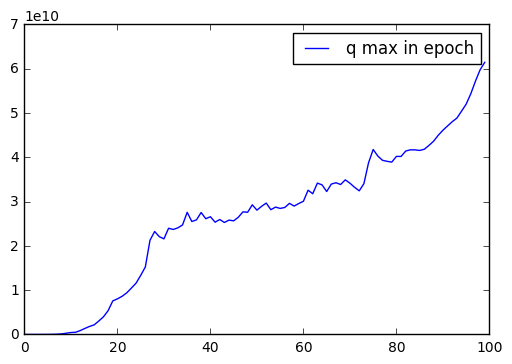

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(qmaxs, label='q max in epoch')
plt.legend()
_ = plt.ylim()

#  ; q max dropped along with epochs

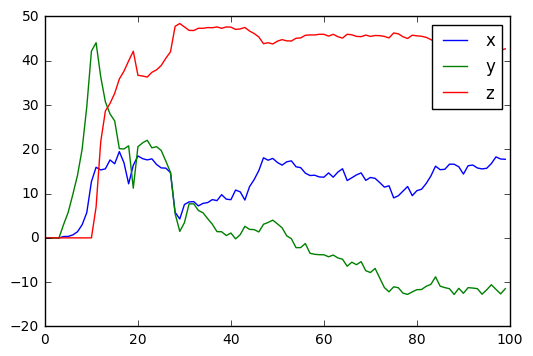

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
xs, ys, zs, _, _, _ = zip(*xyzs)
plt.plot(xs, label='x')
plt.plot(ys, label='y')
plt.plot(zs, label='z')
plt.legend()
_ = plt.ylim()

<pre>[  0.   0.  10.   0.   0.   0.] --> [  0.   0.  50.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1024 12 4 500 0.001 0.01 1 0.9 0.9 32
epoch 1 steps 66 q max 0.0714521 x,y,z = -0.00, -0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 2 steps 66 q max 8.47011 x,y,z = 0.00, 0.00, 0.00; a,b,c = 6.28, 0.00, 0.00           
epoch 3 steps 66 q max 5598.67 x,y,z = 0.00, -0.02, 0.00; a,b,c = 0.57, 0.01, 0.00           
epoch 4 steps 71 q max 267879.0 x,y,z = -0.03, -0.05, 0.00; a,b,c = 5.31, 0.02, 0.00           
epoch 5 steps 100 q max 5.26044e+06 x,y,z = 0.30, 2.99, 0.00; a,b,c = 5.41, 5.14, 0.00           
epoch 6 steps 74 q max 1.03861e+07 x,y,z = 0.32, 5.77, 0.00; a,b,c = 4.97, 5.91, 0.00           
epoch 7 steps 86 q max 2.19126e+07 x,y,z = 0.67, 9.81, 0.00; a,b,c = 4.32, 5.81, 0.00           
epoch 8 steps 103 q max 5.00642e+07 x,y,z = 1.38, 14.12, 0.00; a,b,c = 3.98, 5.64, 0.00           
epoch 9 steps 127 q max 1.29415e+08 x,y,z = 2.96, 20.01, 0.00; a,b,c = 3.79, 5.42, 0.00           
epoch 10 steps 167 q max 2.77914e+08 x,y,z = 5.71, 29.60, 0.00; a,b,c = 3.55, 5.27, 0.00           
epoch 11 steps 227 q max 4.35878e+08 x,y,z = 12.70, 42.17, 0.00; a,b,c = 3.38, 4.90, 0.00           
epoch 12 steps 256 q max 4.94487e+08 x,y,z = 15.94, 44.07, 6.96; a,b,c = 2.90, 4.93, 0.00           
epoch 13 steps 256 q max 8.67396e+08 x,y,z = 15.34, 36.37, 21.71; a,b,c = 2.16, 5.15, 0.00           
epoch 14 steps 256 q max 1.35808e+09 x,y,z = 15.59, 30.72, 28.64; a,b,c = 1.82, 5.22, 0.00           
epoch 15 steps 256 q max 1.80777e+09 x,y,z = 17.60, 27.99, 30.36; a,b,c = 1.69, 5.17, 0.00           
epoch 16 steps 256 q max 2.16592e+09 x,y,z = 16.73, 26.42, 32.64; a,b,c = 1.51, 5.25, 0.00           
epoch 17 steps 256 q max 3.04106e+09 x,y,z = 19.48, 20.14, 35.87; a,b,c = 1.19, 5.15, 0.00           
epoch 18 steps 256 q max 3.98432e+09 x,y,z = 16.95, 20.08, 37.66; a,b,c = 1.18, 5.39, 0.00           
epoch 19 steps 256 q max 5.37548e+09 x,y,z = 12.21, 20.79, 39.95; a,b,c = 1.00, 5.54, 0.00           
epoch 20 steps 256 q max 7.57225e+09 x,y,z = 16.39, 11.22, 42.15; a,b,c = 0.80, 5.33, 0.00           
epoch 21 steps 256 q max 8.03524e+09 x,y,z = 18.50, 20.58, 36.71; a,b,c = 1.25, 5.22, 0.00           
epoch 22 steps 256 q max 8.61493e+09 x,y,z = 17.89, 21.45, 36.55; a,b,c = 1.28, 5.25, 0.00           
epoch 23 steps 256 q max 9.39254e+09 x,y,z = 17.60, 22.05, 36.31; a,b,c = 1.30, 5.25, 0.00           
epoch 24 steps 256 q max 1.04661e+10 x,y,z = 17.85, 20.33, 37.38; a,b,c = 1.20, 5.26, 0.00           
epoch 25 steps 256 q max 1.15717e+10 x,y,z = 16.58, 20.59, 37.94; a,b,c = 1.19, 5.33, 0.00           
epoch 26 steps 256 q max 1.33331e+10 x,y,z = 15.80, 19.75, 38.92; a,b,c = 1.12, 5.38, 0.00           
epoch 27 steps 256 q max 1.52347e+10 x,y,z = 15.74, 17.35, 40.56; a,b,c = 0.93, 5.40, 0.00           
epoch 28 steps 256 q max 2.12577e+10 x,y,z = 14.75, 14.78, 42.02; a,b,c = 0.86, 5.46, 0.00           
epoch 29 steps 256 q max 2.32478e+10 x,y,z = 5.77, 5.43, 47.76; a,b,c = 0.33, 5.88, 0.00           
epoch 30 steps 256 q max 2.2084e+10 x,y,z = 4.26, 1.47, 48.40; a,b,c = 0.23, 5.94, 0.00           
epoch 31 steps 256 q max 2.15837e+10 x,y,z = 7.54, 3.43, 47.63; a,b,c = 0.36, 5.80, 0.00           
epoch 32 steps 256 q max 2.39766e+10 x,y,z = 8.12, 7.68, 46.86; a,b,c = 0.50, 5.79, 0.00           
epoch 33 steps 256 q max 2.37068e+10 x,y,z = 8.19, 7.68, 46.82; a,b,c = 0.49, 5.76, 0.00           
epoch 34 steps 256 q max 2.40688e+10 x,y,z = 7.23, 6.19, 47.33; a,b,c = 0.44, 5.81, 0.00           
epoch 35 steps 256 q max 2.47262e+10 x,y,z = 7.79, 5.66, 47.32; a,b,c = 0.40, 5.79, 0.00           
epoch 36 steps 256 q max 2.75718e+10 x,y,z = 7.97, 4.34, 47.49; a,b,c = 0.34, 5.79, 0.00           
epoch 37 steps 256 q max 2.55031e+10 x,y,z = 8.64, 3.08, 47.45; a,b,c = 0.30, 5.76, 0.00           
epoch 38 steps 256 q max 2.58738e+10 x,y,z = 8.41, 1.41, 47.63; a,b,c = 0.22, 5.75, 0.00           
epoch 39 steps 256 q max 2.75313e+10 x,y,z = 9.76, 1.38, 47.32; a,b,c = 0.21, 5.71, 0.00           
epoch 40 steps 256 q max 2.61329e+10 x,y,z = 8.74, 0.53, 47.63; a,b,c = 0.20, 5.77, 0.00           
epoch 41 steps 256 q max 2.65781e+10 x,y,z = 8.62, 1.09, 47.58; a,b,c = 0.21, 5.73, 0.00           
epoch 42 steps 256 q max 2.53504e+10 x,y,z = 10.80, -0.22, 47.07; a,b,c = 0.18, 5.67, 0.00           
epoch 43 steps 256 q max 2.59545e+10 x,y,z = 10.39, 0.73, 47.18; a,b,c = 0.22, 5.70, 0.00           
epoch 44 steps 256 q max 2.52872e+10 x,y,z = 8.54, 2.61, 47.52; a,b,c = 0.28, 5.75, 0.00           
epoch 45 steps 256 q max 2.58164e+10 x,y,z = 11.56, 1.92, 46.70; a,b,c = 0.25, 5.61, 0.00           
epoch 46 steps 256 q max 2.56551e+10 x,y,z = 13.17, 1.86, 46.14; a,b,c = 0.24, 5.54, 0.00           
epoch 47 steps 256 q max 2.64683e+10 x,y,z = 15.20, 1.34, 45.35; a,b,c = 0.25, 5.44, 0.00           
epoch 48 steps 256 q max 2.76898e+10 x,y,z = 18.08, 3.07, 43.85; a,b,c = 0.34, 5.32, 0.00           
epoch 49 steps 256 q max 2.75872e+10 x,y,z = 17.54, 3.48, 44.07; a,b,c = 0.34, 5.34, 0.00           
epoch 50 steps 256 q max 2.92715e+10 x,y,z = 17.94, 4.00, 43.79; a,b,c = 0.38, 5.32, 0.00           
epoch 51 steps 256 q max 2.80661e+10 x,y,z = 17.02, 3.17, 44.42; a,b,c = 0.31, 5.38, 0.00           
epoch 52 steps 256 q max 2.89352e+10 x,y,z = 16.43, 2.28, 44.76; a,b,c = 0.27, 5.40, 0.00           
epoch 53 steps 256 q max 2.96605e+10 x,y,z = 17.17, 0.47, 44.48; a,b,c = 0.20, 5.35, 0.00           
epoch 54 steps 256 q max 2.81676e+10 x,y,z = 17.39, -0.19, 44.45; a,b,c = 0.16, 5.37, 0.00           
epoch 55 steps 256 q max 2.87567e+10 x,y,z = 16.05, -2.21, 45.07; a,b,c = 0.07, 5.42, 0.00           
epoch 56 steps 256 q max 2.84559e+10 x,y,z = 15.86, -2.20, 45.15; a,b,c = 0.09, 5.43, 0.00           
epoch 57 steps 256 q max 2.86762e+10 x,y,z = 14.62, -1.27, 45.75; a,b,c = 0.09, 5.50, 0.00           
epoch 58 steps 256 q max 2.96044e+10 x,y,z = 14.08, -3.47, 45.83; a,b,c = 0.02, 5.50, 0.00           
epoch 59 steps 256 q max 2.89852e+10 x,y,z = 14.15, -3.71, 45.81; a,b,c = 0.01, 5.51, 0.00           
epoch 60 steps 256 q max 2.95686e+10 x,y,z = 13.76, -3.80, 45.97; a,b,c = 6.28, 5.54, 0.00           
epoch 61 steps 256 q max 3.00752e+10 x,y,z = 13.70, -3.82, 45.96; a,b,c = 6.28, 5.52, 0.00           
epoch 62 steps 256 q max 3.25723e+10 x,y,z = 14.67, -4.27, 45.56; a,b,c = 6.28, 5.49, 0.00           
epoch 63 steps 256 q max 3.17679e+10 x,y,z = 13.70, -3.88, 45.97; a,b,c = 6.28, 5.53, 0.00           
epoch 64 steps 256 q max 3.41713e+10 x,y,z = 14.85, -4.53, 45.42; a,b,c = 6.25, 5.47, 0.00           
epoch 65 steps 256 q max 3.3779e+10 x,y,z = 15.61, -4.82, 45.11; a,b,c = 6.23, 5.46, 0.00           
epoch 66 steps 256 q max 3.22746e+10 x,y,z = 12.95, -6.40, 45.98; a,b,c = 6.18, 5.56, 0.00           
epoch 67 steps 256 q max 3.39566e+10 x,y,z = 13.57, -5.49, 45.85; a,b,c = 6.21, 5.54, 0.00           
epoch 68 steps 256 q max 3.42531e+10 x,y,z = 14.22, -6.06, 45.50; a,b,c = 6.19, 5.49, 0.00           
epoch 69 steps 256 q max 3.38563e+10 x,y,z = 14.67, -5.37, 45.44; a,b,c = 6.21, 5.49, 0.00           
epoch 70 steps 256 q max 3.49075e+10 x,y,z = 12.99, -7.41, 45.79; a,b,c = 6.12, 5.56, 0.00           
epoch 71 steps 256 q max 3.41527e+10 x,y,z = 13.64, -7.83, 45.50; a,b,c = 6.11, 5.54, 0.00           
epoch 72 steps 256 q max 3.32212e+10 x,y,z = 13.44, -6.89, 45.69; a,b,c = 6.14, 5.54, 0.00           
epoch 73 steps 256 q max 3.24317e+10 x,y,z = 12.49, -9.06, 45.66; a,b,c = 6.03, 5.60, 0.00           
epoch 74 steps 256 q max 3.404e+10 x,y,z = 11.46, -11.22, 45.49; a,b,c = 5.96, 5.62, 0.00           
epoch 75 steps 256 q max 3.87507e+10 x,y,z = 11.77, -12.18, 45.15; a,b,c = 5.94, 5.62, 0.00           
epoch 76 steps 256 q max 4.1766e+10 x,y,z = 9.03, -11.05, 46.27; a,b,c = 5.96, 5.73, 0.00           
epoch 77 steps 256 q max 4.02818e+10 x,y,z = 9.52, -11.26, 46.07; a,b,c = 5.95, 5.71, 0.00           
epoch 78 steps 256 q max 3.93271e+10 x,y,z = 10.55, -12.48, 45.42; a,b,c = 5.90, 5.67, 0.00           
epoch 79 steps 256 q max 3.90876e+10 x,y,z = 11.60, -12.76, 45.02; a,b,c = 5.90, 5.62, 0.00           
epoch 80 steps 256 q max 3.89158e+10 x,y,z = 9.53, -12.19, 45.76; a,b,c = 5.90, 5.69, 0.00           
epoch 81 steps 256 q max 4.02073e+10 x,y,z = 10.67, -11.70, 45.62; a,b,c = 5.94, 5.65, 0.00           
epoch 82 steps 256 q max 4.01917e+10 x,y,z = 10.98, -11.66, 45.53; a,b,c = 5.94, 5.64, 0.00           
epoch 83 steps 256 q max 4.14202e+10 x,y,z = 12.30, -10.93, 45.27; a,b,c = 5.97, 5.57, 0.00           
epoch 84 steps 256 q max 4.16879e+10 x,y,z = 13.97, -10.50, 44.78; a,b,c = 6.00, 5.50, 0.00           
epoch 85 steps 256 q max 4.16763e+10 x,y,z = 16.19, -8.79, 44.18; a,b,c = 6.04, 5.41, 0.00           
epoch 86 steps 256 q max 4.15493e+10 x,y,z = 15.40, -10.91, 44.06; a,b,c = 5.97, 5.44, 0.00           
epoch 87 steps 256 q max 4.18199e+10 x,y,z = 15.49, -11.23, 43.90; a,b,c = 5.93, 5.44, 0.00           
epoch 88 steps 256 q max 4.26887e+10 x,y,z = 16.64, -11.48, 43.29; a,b,c = 5.92, 5.38, 0.00           
epoch 89 steps 256 q max 4.3641e+10 x,y,z = 16.63, -12.78, 42.91; a,b,c = 5.89, 5.37, 0.00           
epoch 90 steps 256 q max 4.49896e+10 x,y,z = 16.05, -11.39, 43.60; a,b,c = 5.92, 5.41, 0.00           
epoch 91 steps 256 q max 4.61159e+10 x,y,z = 14.40, -12.52, 43.98; a,b,c = 5.89, 5.48, 0.00           
epoch 92 steps 256 q max 4.70833e+10 x,y,z = 16.28, -11.24, 43.50; a,b,c = 5.94, 5.38, 0.00           
epoch 93 steps 256 q max 4.80385e+10 x,y,z = 16.45, -11.33, 43.45; a,b,c = 5.94, 5.40, 0.00           
epoch 94 steps 256 q max 4.88499e+10 x,y,z = 15.79, -11.47, 43.71; a,b,c = 5.93, 5.42, 0.00           
epoch 95 steps 256 q max 5.04184e+10 x,y,z = 15.57, -12.72, 43.43; a,b,c = 5.87, 5.44, 0.00           
epoch 96 steps 256 q max 5.20097e+10 x,y,z = 15.71, -11.73, 43.65; a,b,c = 5.92, 5.42, 0.00           
epoch 97 steps 256 q max 5.43677e+10 x,y,z = 16.77, -10.58, 43.48; a,b,c = 5.97, 5.37, 0.00           
epoch 98 steps 256 q max 5.72156e+10 x,y,z = 18.28, -11.63, 42.36; a,b,c = 5.91, 5.30, 0.00           
epoch 99 steps 256 q max 5.97718e+10 x,y,z = 17.81, -12.65, 42.37; a,b,c = 5.88, 5.33, 0.00           
epoch 100 steps 256 q max 6.14559e+10 x,y,z = 17.74, -11.47, 42.69; a,b,c = 5.91, 5.31, 0.00           
CPU times: user 11min 30s, sys: 59.4 s, total: 12min 30s
Wall time: 5min 6s
</pre>

<font color=red>===================== 3K epochs ============  parameters: 1024 12 4 500 0.001 0.01 1 0.9 0.9 32
</font>

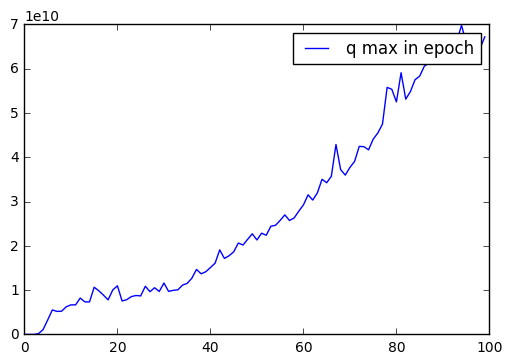

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(qmaxs, label='q max in epoch')
plt.legend()
_ = plt.ylim()

#  ; q max dropped along with epochs

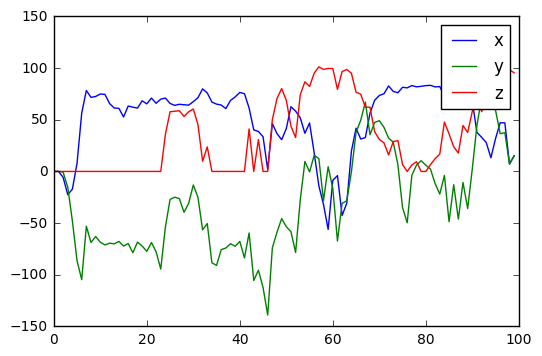

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
xs, ys, zs, _, _, _ = zip(*xyzs)
plt.plot(xs, label='x')
plt.plot(ys, label='y')
plt.plot(zs, label='z')
plt.legend()
_ = plt.ylim()

<pre>[  0.   0.  10.   0.   0.   0.] --> [  0.   0.  50.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 1048576 12 4 500 0.001 0.01 1 0.9 0.9 32
epoch 1 steps 66 q max 0.00713671 x,y,z = 0.00, -0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 2 steps 67 q max 40521.4 x,y,z = 0.06, -0.01, 0.00; a,b,c = 0.06, 0.44, 0.00           
epoch 3 steps 101 q max 5.6202e+06 x,y,z = -5.67, -0.64, 0.00; a,b,c = 5.62, 1.54, 0.00           
epoch 4 steps 192 q max 1.65324e+08 x,y,z = -22.51, -15.33, 0.00; a,b,c = 3.36, 1.61, 0.00           
epoch 5 steps 302 q max 1.07759e+09 x,y,z = -17.06, -48.07, 0.00; a,b,c = 3.77, 0.24, 0.00           
epoch 6 steps 438 q max 3.26339e+09 x,y,z = 8.11, -86.48, 0.00; a,b,c = 4.63, 5.40, 0.00           
epoch 7 steps 484 q max 5.538e+09 x,y,z = 56.43, -104.73, 0.00; a,b,c = 5.40, 4.55, 0.00           
epoch 8 steps 508 q max 5.20088e+09 x,y,z = 78.35, -53.03, 0.00; a,b,c = 5.46, 3.64, 0.00           
epoch 9 steps 473 q max 5.25496e+09 x,y,z = 71.69, -68.78, 0.00; a,b,c = 5.41, 4.07, 0.00           
epoch 10 steps 472 q max 6.25842e+09 x,y,z = 72.56, -62.98, 0.00; a,b,c = 5.36, 4.00, 0.00           
epoch 11 steps 482 q max 6.68006e+09 x,y,z = 74.93, -68.49, 0.00; a,b,c = 5.42, 4.05, 0.00           
epoch 12 steps 496 q max 6.674e+09 x,y,z = 74.55, -71.10, 0.00; a,b,c = 5.37, 4.01, 0.00           
epoch 13 steps 458 q max 8.22255e+09 x,y,z = 65.67, -69.38, 0.00; a,b,c = 5.18, 4.20, 0.00           
epoch 14 steps 446 q max 7.34887e+09 x,y,z = 61.40, -70.08, 0.00; a,b,c = 5.11, 4.28, 0.00           
epoch 15 steps 442 q max 7.34987e+09 x,y,z = 61.07, -67.72, 0.00; a,b,c = 5.03, 4.29, 0.00           
epoch 16 steps 427 q max 1.06635e+10 x,y,z = 52.72, -72.17, 0.00; a,b,c = 4.96, 4.48, 0.00           
epoch 17 steps 450 q max 9.85734e+09 x,y,z = 63.33, -69.81, 0.00; a,b,c = 5.15, 4.29, 0.00           
epoch 18 steps 465 q max 8.87553e+09 x,y,z = 62.20, -78.66, 0.00; a,b,c = 5.18, 4.41, 0.00           
epoch 19 steps 443 q max 7.81431e+09 x,y,z = 61.34, -68.37, 0.00; a,b,c = 5.10, 4.30, 0.00           
epoch 20 steps 467 q max 1.00607e+10 x,y,z = 68.36, -72.19, 0.00; a,b,c = 5.26, 4.25, 0.00           
epoch 21 steps 467 q max 1.09746e+10 x,y,z = 65.41, -77.29, 0.00; a,b,c = 5.28, 4.28, 0.00           
epoch 22 steps 474 q max 7.55895e+09 x,y,z = 70.96, -68.80, 0.00; a,b,c = 5.29, 4.16, 0.00           
epoch 23 steps 477 q max 7.85428e+09 x,y,z = 65.96, -77.74, 0.00; a,b,c = 5.20, 4.38, 0.00           
epoch 24 steps 496 q max 8.54931e+09 x,y,z = 69.98, -94.44, 0.00; a,b,c = 5.48, 4.30, 0.00           
epoch 25 steps 512 q max 8.79594e+09 x,y,z = 71.03, -53.75, 35.94; a,b,c = 5.68, 4.42, 0.00           
epoch 26 steps 512 q max 8.69796e+09 x,y,z = 65.81, -27.11, 57.80; a,b,c = 5.94, 4.62, 0.00           
epoch 27 steps 512 q max 1.08756e+10 x,y,z = 63.96, -24.90, 58.24; a,b,c = 5.98, 4.54, 0.00           
epoch 28 steps 512 q max 9.65971e+09 x,y,z = 65.00, -26.30, 58.77; a,b,c = 5.93, 4.61, 0.00           
epoch 29 steps 512 q max 1.05429e+10 x,y,z = 64.54, -39.51, 53.18; a,b,c = 5.72, 4.64, 0.00           
epoch 30 steps 512 q max 9.70525e+09 x,y,z = 64.17, -30.90, 57.76; a,b,c = 5.87, 4.63, 0.00           
epoch 31 steps 512 q max 1.1611e+10 x,y,z = 67.55, -13.10, 60.41; a,b,c = 6.17, 4.61, 0.00           
epoch 32 steps 512 q max 9.72137e+09 x,y,z = 71.34, -25.06, 45.42; a,b,c = 5.87, 4.27, 0.00           
epoch 33 steps 512 q max 9.96447e+09 x,y,z = 79.92, -56.47, 9.83; a,b,c = 5.63, 3.89, 0.00           
epoch 34 steps 512 q max 1.00699e+10 x,y,z = 75.97, -50.43, 23.80; a,b,c = 5.59, 4.15, 0.00           
epoch 35 steps 494 q max 1.11425e+10 x,y,z = 67.12, -88.43, 0.00; a,b,c = 5.36, 4.32, 0.00           
epoch 36 steps 496 q max 1.15288e+10 x,y,z = 65.15, -90.92, 0.00; a,b,c = 5.32, 4.39, 0.00           
epoch 37 steps 472 q max 1.26969e+10 x,y,z = 64.28, -75.67, 0.00; a,b,c = 5.17, 4.31, 0.00           
epoch 38 steps 454 q max 1.46764e+10 x,y,z = 60.84, -74.09, 0.00; a,b,c = 5.11, 4.32, 0.00           
epoch 39 steps 463 q max 1.37015e+10 x,y,z = 68.76, -69.99, 0.00; a,b,c = 5.34, 4.13, 0.00           
epoch 40 steps 483 q max 1.41565e+10 x,y,z = 72.09, -72.42, 0.00; a,b,c = 5.43, 4.03, 0.00           
epoch 41 steps 494 q max 1.51031e+10 x,y,z = 76.48, -67.69, 0.00; a,b,c = 5.44, 3.94, 0.00           
epoch 42 steps 508 q max 1.60904e+10 x,y,z = 75.26, -83.68, 0.00; a,b,c = 5.50, 4.19, 0.00           
epoch 43 steps 512 q max 1.90933e+10 x,y,z = 61.36, -59.54, 41.18; a,b,c = 5.47, 4.67, 0.00           
epoch 44 steps 494 q max 1.71681e+10 x,y,z = 40.21, -105.51, 0.00; a,b,c = 5.14, 4.87, 0.00           
epoch 45 steps 512 q max 1.77672e+10 x,y,z = 38.68, -95.61, 30.81; a,b,c = 5.32, 5.07, 0.00           
epoch 46 steps 502 q max 1.86446e+10 x,y,z = 33.64, -112.31, 0.00; a,b,c = 5.14, 5.16, 0.00           
epoch 47 steps 510 q max 2.06426e+10 x,y,z = 1.85, -138.97, 0.00; a,b,c = 5.26, 5.42, 0.00           
epoch 48 steps 512 q max 2.01933e+10 x,y,z = 46.32, -73.86, 50.20; a,b,c = 5.54, 4.98, 0.00           
epoch 49 steps 512 q max 2.14758e+10 x,y,z = 36.60, -58.83, 70.57; a,b,c = 5.69, 5.22, 0.00           
epoch 50 steps 512 q max 2.27303e+10 x,y,z = 30.74, -45.66, 80.19; a,b,c = 5.82, 5.26, 0.00           
epoch 51 steps 512 q max 2.13301e+10 x,y,z = 41.51, -53.45, 68.83; a,b,c = 5.74, 5.05, 0.00           
epoch 52 steps 512 q max 2.28654e+10 x,y,z = 62.63, -58.30, 43.85; a,b,c = 5.58, 4.67, 0.00           
epoch 53 steps 512 q max 2.23963e+10 x,y,z = 58.40, -78.42, 32.79; a,b,c = 5.50, 4.69, 0.00           
epoch 54 steps 512 q max 2.44257e+10 x,y,z = 51.90, -27.62, 74.16; a,b,c = 6.06, 4.97, 0.00           
epoch 55 steps 512 q max 2.46398e+10 x,y,z = 36.94, 9.69, 86.77; a,b,c = 0.12, 5.22, 0.00           
epoch 56 steps 512 q max 2.57657e+10 x,y,z = 46.90, -0.42, 82.22; a,b,c = 0.03, 5.13, 0.00           
epoch 57 steps 512 q max 2.69995e+10 x,y,z = 17.87, 15.63, 95.17; a,b,c = 0.16, 5.57, 0.00           
epoch 58 steps 512 q max 2.57357e+10 x,y,z = -13.94, 12.47, 101.26; a,b,c = 0.05, 5.91, 0.00           
epoch 59 steps 512 q max 2.63065e+10 x,y,z = -32.02, -28.21, 98.71; a,b,c = 6.09, 6.05, 0.00           
epoch 60 steps 512 q max 2.78253e+10 x,y,z = -56.05, 4.58, 99.71; a,b,c = 0.05, 6.11, 0.00           
epoch 61 steps 512 q max 2.92551e+10 x,y,z = -8.60, -16.40, 99.58; a,b,c = 5.97, 5.75, 0.00           
epoch 62 steps 512 q max 3.15266e+10 x,y,z = -4.02, -67.33, 79.49; a,b,c = 5.63, 5.78, 0.00           
epoch 63 steps 512 q max 3.03486e+10 x,y,z = -42.65, -30.83, 96.66; a,b,c = 6.01, 6.11, 0.00           
epoch 64 steps 512 q max 3.19659e+10 x,y,z = -30.76, -28.52, 98.67; a,b,c = 5.98, 5.92, 0.00           
epoch 65 steps 512 q max 3.50348e+10 x,y,z = 19.63, -0.42, 95.04; a,b,c = 0.12, 5.45, 0.00           
epoch 66 steps 512 q max 3.42576e+10 x,y,z = 41.83, 37.89, 76.64; a,b,c = 0.53, 5.11, 0.00           
epoch 67 steps 512 q max 3.57044e+10 x,y,z = 31.38, 49.45, 74.85; a,b,c = 0.84, 5.17, 0.00           
epoch 68 steps 512 q max 4.28949e+10 x,y,z = 32.78, 67.09, 62.21; a,b,c = 1.08, 5.08, 0.00           
epoch 69 steps 512 q max 3.72264e+10 x,y,z = 56.42, 35.57, 62.18; a,b,c = 0.65, 4.70, 0.00           
epoch 70 steps 512 q max 3.59848e+10 x,y,z = 68.89, 47.42, 38.40; a,b,c = 1.07, 4.30, 0.00           
epoch 71 steps 512 q max 3.77131e+10 x,y,z = 73.50, 49.14, 31.06; a,b,c = 1.20, 4.19, 0.00           
epoch 72 steps 512 q max 3.90601e+10 x,y,z = 75.16, 42.75, 27.70; a,b,c = 1.17, 3.87, 0.00           
epoch 73 steps 512 q max 4.24616e+10 x,y,z = 82.74, 32.24, 15.96; a,b,c = 0.96, 3.66, 0.00           
epoch 74 steps 512 q max 4.24074e+10 x,y,z = 77.43, 28.37, 28.89; a,b,c = 0.63, 3.92, 0.00           
epoch 75 steps 512 q max 4.16804e+10 x,y,z = 76.18, 6.47, 29.89; a,b,c = 6.26, 3.70, 0.00           
epoch 76 steps 512 q max 4.40845e+10 x,y,z = 81.45, -35.01, 6.63; a,b,c = 5.81, 3.38, 0.00           
epoch 77 steps 504 q max 4.54946e+10 x,y,z = 80.88, -49.63, 0.00; a,b,c = 5.76, 3.39, 0.00           
epoch 78 steps 512 q max 4.7502e+10 x,y,z = 83.11, -3.74, 6.26; a,b,c = 6.18, 3.19, 0.00           
epoch 79 steps 512 q max 5.57906e+10 x,y,z = 81.90, 6.12, 9.42; a,b,c = 0.18, 3.18, 0.00           
epoch 80 steps 499 q max 5.5359e+10 x,y,z = 82.36, 10.41, 0.00; a,b,c = 0.31, 2.95, 0.00           
epoch 81 steps 508 q max 5.25113e+10 x,y,z = 83.04, 6.05, 0.00; a,b,c = 0.13, 2.91, 0.00           
epoch 82 steps 512 q max 5.90958e+10 x,y,z = 83.33, 2.29, 6.59; a,b,c = 0.02, 3.24, 0.00           
epoch 83 steps 512 q max 5.31316e+10 x,y,z = 81.82, -11.70, 12.32; a,b,c = 5.93, 3.37, 0.00           
epoch 84 steps 512 q max 5.48324e+10 x,y,z = 82.14, -21.90, 16.71; a,b,c = 5.94, 3.62, 0.00           
epoch 85 steps 512 q max 5.75118e+10 x,y,z = 72.87, -3.85, 47.77; a,b,c = 6.07, 4.25, 0.00           
epoch 86 steps 512 q max 5.83265e+10 x,y,z = 72.12, -48.66, 36.36; a,b,c = 5.83, 4.24, 0.00           
epoch 87 steps 512 q max 6.0581e+10 x,y,z = 79.22, -12.84, 23.89; a,b,c = 5.99, 3.67, 0.00           
epoch 88 steps 512 q max 6.13149e+10 x,y,z = 79.68, -46.07, 17.78; a,b,c = 5.77, 3.90, 0.00           
epoch 89 steps 512 q max 6.33639e+10 x,y,z = 74.33, -10.63, 44.49; a,b,c = 6.04, 4.20, 0.00           
epoch 90 steps 512 q max 6.21245e+10 x,y,z = 76.59, -35.91, 37.74; a,b,c = 5.92, 4.26, 0.00           
epoch 91 steps 512 q max 6.14368e+10 x,y,z = 67.69, 2.56, 58.12; a,b,c = 0.16, 4.52, 0.00           
epoch 92 steps 512 q max 6.48221e+10 x,y,z = 37.71, 44.71, 75.71; a,b,c = 0.75, 5.21, 0.00           
epoch 93 steps 512 q max 6.52635e+10 x,y,z = 33.09, 71.14, 57.80; a,b,c = 1.18, 5.07, 0.00           
epoch 94 steps 512 q max 6.63211e+10 x,y,z = 27.92, 62.97, 68.44; a,b,c = 1.01, 5.22, 0.00           
epoch 95 steps 512 q max 6.98058e+10 x,y,z = 13.22, 73.43, 66.11; a,b,c = 1.16, 5.42, 0.00           
epoch 96 steps 512 q max 6.58903e+10 x,y,z = 31.86, 59.13, 69.97; a,b,c = 0.88, 5.16, 0.00           
epoch 97 steps 512 q max 6.3659e+10 x,y,z = 47.12, 36.50, 71.11; a,b,c = 0.67, 4.95, 0.00           
epoch 98 steps 512 q max 6.36968e+10 x,y,z = 47.02, 37.53, 74.88; a,b,c = 0.49, 5.16, 0.00           
epoch 99 steps 512 q max 6.46504e+10 x,y,z = 7.26, 7.07, 98.43; a,b,c = 0.12, 5.62, 0.00           
epoch 100 steps 512 q max 6.72014e+10 x,y,z = 15.13, 15.20, 95.41; a,b,c = 0.18, 5.49, 0.00           
CPU times: user 26min 31s, sys: 2min 6s, total: 28min 37s
Wall time: 11min 37s
</pre>

<pre>[  0.   0.  10.   0.   0.   0.] --> [  0.   0.  25.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 128000 12 4 500 0.001 0.01 1 0.9 0.9 32
epoch 1 steps 66 q max 0.0276599 x,y,z = 0.00, 0.00, 0.00; a,b,c = 6.28, 0.00, 0.00           
epoch 2 steps 66 q max -14.8151 x,y,z = 0.00, -0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 3 steps 66 q max -20.8218 x,y,z = 0.00, 0.00, 0.00; a,b,c = 6.28, 0.00, 0.00           
epoch 4 steps 66 q max -21.3136 x,y,z = -0.00, 0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 5 steps 66 q max -15.9144 x,y,z = -0.00, 0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 6 steps 66 q max -17.3133 x,y,z = -0.00, -0.00, 0.00; a,b,c = 0.00, 6.28, 0.00           
epoch 7 steps 66 q max -16.4849 x,y,z = -0.00, 0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 8 steps 66 q max -37.9993 x,y,z = -0.00, 0.00, 0.00; a,b,c = 6.28, 6.28, 0.00           
epoch 9 steps 66 q max 1101.45 x,y,z = 0.00, -0.00, 0.00; a,b,c = 0.00, 0.00, 0.00           
epoch 10 steps 73 q max 5.97109e+06 x,y,z = -0.27, -0.00, 0.00; a,b,c = 0.15, 0.76, 0.00           
epoch 11 steps 69 q max 4.44961e+07 x,y,z = -1.12, 0.02, 0.00; a,b,c = 6.27, 5.36, 0.00           
epoch 12 steps 101 q max 2.04071e+08 x,y,z = -11.29, -0.02, 0.00; a,b,c = 0.30, 3.19, 0.00           
epoch 13 steps 182 q max 9.64362e+08 x,y,z = -28.27, 3.21, 0.00; a,b,c = 0.83, 2.66, 0.00           
epoch 14 steps 256 q max 3.09945e+09 x,y,z = -39.70, 8.54, 11.89; a,b,c = 1.31, 2.15, 0.00           
epoch 15 steps 256 q max 6.76272e+09 x,y,z = -32.35, 21.57, 19.80; a,b,c = 1.80, 2.18, 0.00           
epoch 16 steps 256 q max 1.13533e+10 x,y,z = -35.66, 11.06, 27.02; a,b,c = 0.17, 1.71, 0.00           
epoch 17 steps 256 q max 2.24259e+10 x,y,z = -32.21, -24.22, 22.41; a,b,c = 4.66, 0.95, 0.00           
epoch 18 steps 256 q max 1.9137e+10 x,y,z = -16.47, -29.43, 33.30; a,b,c = 5.23, 0.25, 0.00           
epoch 19 steps 256 q max 4.32993e+10 x,y,z = 23.88, 18.85, 34.85; a,b,c = 1.36, 5.41, 0.00           
epoch 20 steps 256 q max 4.42851e+10 x,y,z = 7.06, 42.12, 12.55; a,b,c = 2.97, 5.93, 0.00           
epoch 21 steps 256 q max 4.86699e+10 x,y,z = 29.75, 39.98, 15.19; a,b,c = 2.20, 4.16, 0.00           
epoch 22 steps 250 q max 5.23194e+10 x,y,z = 20.94, 44.68, 0.00; a,b,c = 3.64, 5.12, 0.00           
epoch 23 steps 256 q max 4.9356e+10 x,y,z = -17.64, 39.07, 22.14; a,b,c = 1.73, 1.48, 0.00           
epoch 24 steps 256 q max 5.06491e+10 x,y,z = -42.14, 10.32, 13.73; a,b,c = 0.88, 2.70, 0.00
... ...
</pre>

<font color=red> reward on (s, a) =============== 200 epochs ============  parameters: 128000 12 4 500 0.001 0.01 1 0.9 0.9 32
</font>

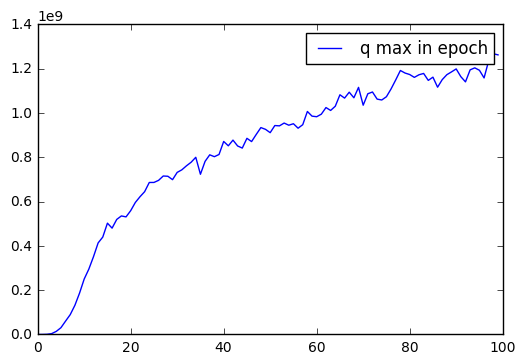

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(qmaxs, label='q max in epoch')
plt.legend()
_ = plt.ylim()

#  ; q max dropped along with epochs

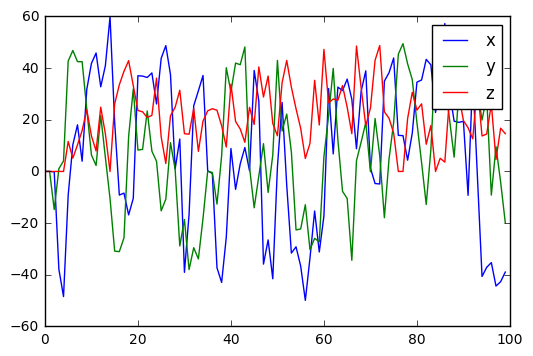

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
xs, ys, zs, _, _, _ = zip(*xyzs)
plt.plot(xs, label='x')
plt.plot(ys, label='y')
plt.plot(zs, label='z')
plt.legend()
_ = plt.ylim()

<pre>[  0.   0.  10.   0.   0.   0.] --> [  0.   0.  25.]
replay_buffer_size, state_dim, action_dim, action_bound, actor_lr, critic_lr, gamma, actor_tau, critic_tau, batch_size
 128000 12 4 500 0.001 0.01 1 0.9 0.9 32
epoch 10 steps 256 q max 1.86448e+08 x,y,z = 31.76, 24.06, 23.87; a,b,c = 1.62, 4.39, 0.00           
epoch 20 steps 256 q max 5.30954e+08 x,y,z = -10.41, 31.97, 33.21; a,b,c = 1.30, 6.25, 0.00           
------------ target pos reached.  epoch  29 step 134 (0.95, 0.84, 24.83), angles (6.25, 6.10, 0.00)
epoch 30 steps 256 q max 6.98993e+08 x,y,z = 12.55, -28.85, 31.42; a,b,c = 4.31, 5.86, 0.00           
------------ target pos reached.  epoch  36 step 126 (0.28, 0.06, 23.45), angles (0.02, 6.26, 0.00)
------------ target pos reached.  epoch  37 step 131 (-0.78, -0.40, 24.28), angles (6.12, 0.21, 0.00)
epoch 40 steps 256 q max 8.12759e+08 x,y,z = -25.51, 40.16, 9.44; a,b,c = 2.36, 1.48, 0.00           
------------ target pos reached.  epoch  45 step 134 (0.25, 1.54, 24.82), angles (0.01, 6.19, 0.00)
epoch 50 steps 256 q max 9.26195e+08 x,y,z = -41.55, 6.39, 18.58; a,b,c = 0.37, 2.05, 0.00           
epoch 60 steps 256 q max 9.85861e+08 x,y,z = -31.18, -27.26, 18.00; a,b,c = 3.92, 2.06, 0.00           
epoch 70 steps 256 q max 1.11579e+09 x,y,z = 38.94, 18.94, 17.70; a,b,c = 0.75, 3.76, 0.00           
------------ target pos reached.  epoch  71 step 132 (1.30, -0.10, 24.48), angles (6.21, 6.16, 0.00)
epoch 80 steps 256 q max 1.18057e+09 x,y,z = 14.85, 35.53, 30.64; a,b,c = 1.23, 5.73, 0.00           
epoch 90 steps 256 q max 1.18581e+09 x,y,z = 19.00, 29.92, 29.50; a,b,c = 1.56, 5.19, 0.00           
epoch 100 steps 256 q max 1.26258e+09 x,y,z = -38.94, -19.83, 14.63; a,b,c = 3.91, 1.68, 0.00           
CPU times: user 4min 9s, sys: 18.2 s, total: 4min 27s
Wall time: 2min 17s
</pre>

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
my reward is sum of a few factors: 
<br>1. improvement of distance to target -- maybe i can refine it to favor movement towards to target
<br>2. no rotation -- sum of eular angles
<br>3. no shifting on x or y coordinates

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- first, use stochastic gradient search, which is already implemented in policy_search.py. it is too hard to find a good answer; hard to balance 4 rotors and keep the quadcopter in good poses; the quadcopter always fell to the ground and crawled thereafter.  *without* visualized simulation, i didn't find the error at the beginning for a long time. 
then, i tried monte carlo policy gradient; before this project i tried the implementation on CliffWalk and it turned out the code was highly unstable: it seems to me that first random searches are critical to further search quality.
in the course, we tried discrete algorithms on CliffWalk, my search is unstable either; it seems to me that states near to cliff (reward -100) often had large negative rewards because of stochastic actions... this seems intuitive; but i was surprised that no one mentioned that states near to bad terminal states were *polluted* by large negative rewards.  i asked my mentor about this phenomenon but he didn't have too much experience in rl.
also, start state is 36, successful terminal state is 47; for most states the policy is 1 (or 2); state->action mapping is *not continuous* in nature.  i am not sure whether using MCPG (which is for continuous state) fits the problem very well.
moreover, it is hard to reach states 11, 23, 35; so the policy nn is highly likely underfit for these states.

i guess in an efficient training, we see episodes that are neither too short nor too long: it can both follow good/the best policy and also reach corner cases.

- final choise? No, far far away from it...
- right now i am using monte carlo policy gradient; i am afraid it is a bad choise. need reviewer's help here!

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- This one is extremely hard; and i guess that there are two factors that makes this task even harder than necessary: 1) there is *good* code template to follow, 2) removal of visualization
- so far, a lot aha moments when i found out how i did wrong; good learning, though painful
- right away, extremely bad, even worse than stochastic search.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- the hardest part is to understand what instructors were saying, how the teaching is mapped to this project. i guess that the second hardest part is the abscence of visualization; third, bad existing code.
- *absolutely*